In [41]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from matplotlib import cm



def data_import(path, delimiter):
    # Read the data, treating empty strings as NaN
    if delimiter == 'none':
        data = pd.read_csv(path, na_values=["", " ", "nan", "NaN", "NA"])
    else:
        data = pd.read_csv(path, delimiter=delimiter, na_values=["", " ", "nan", "NaN", "NA"])
    
    # Drop rows with any NaN values
    data.dropna(axis=0, how='any', inplace=True)
    return data



def data_frequency(file1, desired_frequency: str):
    # Ensure 'Time(UTC)' is in datetime format
    file1['Time(UTC)'] = pd.to_datetime(file1['Time(UTC)'])

    # Set 'Time(UTC)' as the index
    file1.set_index('Time(UTC)', inplace=True)

    if desired_frequency == 'ten_minute':
        file1 = file1.resample('10T').mean()
    elif desired_frequency == '4_hourly':
        file1 = file1.resample('4H').mean()
    elif desired_frequency == 'hourly':
        file1 = file1.resample('H').mean()
    elif desired_frequency == 'twelve_hourly':
        file1 = file1.resample('12H').mean()
    elif desired_frequency == 'daily':
        file1 = file1.resample('D').mean()

    # Drop any rows with NaN values after resampling
    # Drop rows with any NaN values
    file1.dropna(axis=0, how='any', inplace=True)    
    # Reset the index and name it 'Time(UTC)'
    file1.reset_index(inplace=True)
    file1.rename(columns={file1.index.name: 'Time(UTC)'}, inplace=True)

    return file1

def time_to_sincos(df):
    sin_values = []
    cos_values = []

    for i in range(len(df)):
        sin_values.append(np.sin((2 * np.pi * i) / 365.25))
        cos_values.append(np.cos((2 * np.pi * i) / 365.25))
        
    df['Time_sin'] = sin_values
    df['Time_cos'] = cos_values
    
    return df


#importing s2 and m1 data sets
s2_site_data= data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILS2_cleaned.csv", 'none')
m1_site_data = data_import("C:\\Users\\396760\\lanl\\data\\ARMSAILM1_cleaned.csv", 'none')

#change to 12 hour frequency 
s2_site_data = data_frequency(s2_site_data, 'hourly')
m1_site_data = data_frequency(m1_site_data, 'hourly') 

#extract time(UTC) collumns for usage later
time_s2 = s2_site_data['Time(UTC)']
time_m1 = m1_site_data['Time(UTC)']

#remove pressure data from sets
""" s2_site_data.drop(columns=['sample_pres_mmHg'], inplace=True)
m1_site_data.drop(columns=['sample_pres_mmHg'], inplace=True) """


#add sin and cos time values to data
s2_site_data = time_to_sincos(s2_site_data)
m1_site_data = time_to_sincos(m1_site_data)


#change entire dataset to tensor
collumns = ['Time_sin', 'sample_rh_pct', 'sample_temp_C', 'pm_1_ug_per_m3']

s2_site_data = torch.tensor(s2_site_data[collumns].values, dtype=torch.float32)
m1_site_data = torch.tensor(m1_site_data[collumns].values, dtype=torch.float32)


In [42]:
def count_points_in_month(time_series, month, year):
    # Convert the time series to datetime format
    time_series = pd.to_datetime(time_series)
    
    # Filter the series for the given month and year
    mask = (time_series.dt.month == month) & (time_series.dt.year == year)
    filtered_series = time_series[mask]
    
    # Count the number of data points in the filtered series
    count = filtered_series.shape[0]
    
    return count

# Example usage
# Count the number of data points for each month in s2 data
points_in_june_2022 = count_points_in_month(time_s2, 6, 2022)
print(f'Number of data points in June 2022: {points_in_june_2022}')

points_in_july_2022 = count_points_in_month(time_s2, 7, 2022)
print(f'Number of data points in July 2022: {points_in_july_2022}')

points_in_august_2022 = count_points_in_month(time_s2, 8, 2022)
print(f'Number of data points in August 2022: {points_in_august_2022}')

points_in_september_2022 = count_points_in_month(time_s2, 9, 2022)
print(f'Number of data points in September 2022: {points_in_september_2022}')

points_in_october_2022 = count_points_in_month(time_s2, 10, 2022)
print(f'Number of data points in October 2022: {points_in_october_2022}')

points_in_november_2022 = count_points_in_month(time_s2, 11, 2022)
print(f'Number of data points in November 2022: {points_in_november_2022}')

# Count the number of data points in December 2022
points_in_december_2022 = count_points_in_month(time_s2, 12, 2022)
print(f'Number of data points in December 2022: {points_in_december_2022}')

# Count the number of data points in January 2023
points_in_january_2023 = count_points_in_month(time_s2, 1, 2023)
print(f'Number of data points in January 2023: {points_in_january_2023}')

# Count the number of data points in February 2023
points_in_february_2023 = count_points_in_month(time_s2, 2, 2023)
print(f'Number of data points in February 2023: {points_in_february_2023}')

# Count the number of data points in March 2023
points_in_march_2023 = count_points_in_month(time_s2, 3, 2023)
print(f'Number of data points in March 2023: {points_in_march_2023}')

# Count the number of data points in April 2023
points_in_april_2023 = count_points_in_month(time_s2, 4, 2023)
print(f'Number of data points in April 2023: {points_in_april_2023}')

# Count the number of data points in May 2023
points_in_may_2023 = count_points_in_month(time_s2, 5, 2023)
print(f'Number of data points in May 2023: {points_in_may_2023}')

# Count the number of data points in June 2023
points_in_june_2023 = count_points_in_month(time_s2, 6, 2023)
print(f'Number of data points in June 2023: {points_in_june_2023}')


# Count the number of data points for each month in m1 data
points_in_june_2022_m1 = count_points_in_month(time_m1, 6, 2022)
print(f'Number of data points in June 2022 (m1): {points_in_june_2022_m1}')

points_in_july_2022_m1 = count_points_in_month(time_m1, 7, 2022)
print(f'Number of data points in July 2022 (m1): {points_in_july_2022_m1}')

points_in_august_2022_m1 = count_points_in_month(time_m1, 8, 2022)
print(f'Number of data points in August 2022 (m1): {points_in_august_2022_m1}')

points_in_september_2022_m1 = count_points_in_month(time_m1, 9, 2022)
print(f'Number of data points in September 2022 (m1): {points_in_september_2022_m1}')

points_in_october_2022_m1 = count_points_in_month(time_m1, 10, 2022)
print(f'Number of data points in October 2022 (m1): {points_in_october_2022_m1}')

points_in_november_2022_m1 = count_points_in_month(time_m1, 11, 2022)
print(f'Number of data points in November 2022 (m1): {points_in_november_2022_m1}')

points_in_december_2022_m1 = count_points_in_month(time_m1, 12, 2022)
print(f'Number of data points in December 2022 (m1): {points_in_december_2022_m1}')

points_in_january_2023_m1 = count_points_in_month(time_m1, 1, 2023)
print(f'Number of data points in January 2023 (m1): {points_in_january_2023_m1}')

points_in_february_2023_m1 = count_points_in_month(time_m1, 2, 2023)
print(f'Number of data points in February 2023 (m1): {points_in_february_2023_m1}')

points_in_march_2023_m1 = count_points_in_month(time_m1, 3, 2023)
print(f'Number of data points in March 2023 (m1): {points_in_march_2023_m1}')

points_in_april_2023_m1 = count_points_in_month(time_m1, 4, 2023)
print(f'Number of data points in April 2023 (m1): {points_in_april_2023_m1}')

points_in_may_2023_m1 = count_points_in_month(time_m1, 5, 2023)
print(f'Number of data points in May 2023 (m1): {points_in_may_2023_m1}')

points_in_june_2023_m1 = count_points_in_month(time_m1, 6, 2023)
print(f'Number of data points in June 2023 (m1): {points_in_june_2023_m1}')

#split time_{m1, s2} months and define variables based on that
time_s2 = pd.to_datetime(time_s2)
time_m1 = pd.to_datetime(time_m1)

time_s2_june_2022 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2022)]
time_s2_july_2022 = time_s2[(time_s2.dt.month == 7) & (time_s2.dt.year == 2022)]
time_s2_august_2022 = time_s2[(time_s2.dt.month == 8) & (time_s2.dt.year == 2022)]
time_s2_september_2022 = time_s2[(time_s2.dt.month == 9) & (time_s2.dt.year == 2022)]
time_s2_october_2022 = time_s2[(time_s2.dt.month == 10) & (time_s2.dt.year == 2022)]
time_s2_november_2022 = time_s2[(time_s2.dt.month == 11) & (time_s2.dt.year == 2022)]
time_s2_december_2022 = time_s2[(time_s2.dt.month == 12) & (time_s2.dt.year == 2022)]
time_s2_january_2023 = time_s2[(time_s2.dt.month == 1) & (time_s2.dt.year == 2023)]
time_s2_february_2023 = time_s2[(time_s2.dt.month == 2) & (time_s2.dt.year == 2023)]
time_s2_march_2023 = time_s2[(time_s2.dt.month == 3) & (time_s2.dt.year == 2023)]
time_s2_april_2023 = time_s2[(time_s2.dt.month == 4) & (time_s2.dt.year == 2023)]
time_s2_may_2023 = time_s2[(time_s2.dt.month == 5) & (time_s2.dt.year == 2023)]
time_s2_june_2023 = time_s2[(time_s2.dt.month == 6) & (time_s2.dt.year == 2023)]

time_m1_june_2022 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2022)]
time_m1_july_2022 = time_m1[(time_m1.dt.month == 7) & (time_m1.dt.year == 2022)]
time_m1_august_2022 = time_m1[(time_m1.dt.month == 8) & (time_m1.dt.year == 2022)]
time_m1_september_2022 = time_m1[(time_m1.dt.month == 9) & (time_m1.dt.year == 2022)]
time_m1_october_2022 = time_m1[(time_m1.dt.month == 10) & (time_m1.dt.year == 2022)]
time_m1_november_2022 = time_m1[(time_m1.dt.month == 11) & (time_m1.dt.year == 2022)]
time_m1_december_2022 = time_m1[(time_m1.dt.month == 12) & (time_m1.dt.year == 2022)]
time_m1_january_2023 = time_m1[(time_m1.dt.month == 1) & (time_m1.dt.year == 2023)]
time_m1_february_2023 = time_m1[(time_m1.dt.month == 2) & (time_m1.dt.year == 2023)]
time_m1_march_2023 = time_m1[(time_m1.dt.month == 3) & (time_m1.dt.year == 2023)]
time_m1_april_2023 = time_m1[(time_m1.dt.month == 4) & (time_m1.dt.year == 2023)]
time_m1_may_2023 = time_m1[(time_m1.dt.month == 5) & (time_m1.dt.year == 2023)]
time_m1_june_2023 = time_m1[(time_m1.dt.month == 6) & (time_m1.dt.year == 2023)]


Number of data points in June 2022: 241
Number of data points in July 2022: 706
Number of data points in August 2022: 744
Number of data points in September 2022: 720
Number of data points in October 2022: 530
Number of data points in November 2022: 521
Number of data points in December 2022: 677
Number of data points in January 2023: 455
Number of data points in February 2023: 587
Number of data points in March 2023: 697
Number of data points in April 2023: 707
Number of data points in May 2023: 744
Number of data points in June 2023: 405
Number of data points in June 2022 (m1): 72
Number of data points in July 2022 (m1): 712
Number of data points in August 2022 (m1): 744
Number of data points in September 2022 (m1): 720
Number of data points in October 2022 (m1): 727
Number of data points in November 2022 (m1): 588
Number of data points in December 2022 (m1): 629
Number of data points in January 2023 (m1): 648
Number of data points in February 2023 (m1): 284
Number of data points in 

In [43]:
def create_monthly_subsets(data_tensor, num_points_dict, prefix):
    start_idx = 0
    subsets = {}

    for year_month, num_points in num_points_dict.items():
        # Calculate the end index
        end_idx = start_idx + num_points
        
        # Create a name for the subset
        subset_name = f"{prefix}_{year_month.replace('-', '_')}"
        
        # Slice the data tensor to get the subset
        subsets[subset_name] = data_tensor[start_idx:end_idx]
        
        # Update the start index
        start_idx = end_idx
    
    return subsets

# Provided values for the number of data points per month
num_points_s2 = {
    "2022-06": points_in_june_2022,
    "2022-07": points_in_july_2022,
    "2022-08": points_in_august_2022,
    "2022-09": points_in_september_2022,
    "2022-10": points_in_october_2022,
    "2022-11": points_in_november_2022,
    "2022-12": points_in_december_2022,
    "2023-01": points_in_january_2023,
    "2023-02": points_in_february_2023,
    "2023-03": points_in_march_2023,
    "2023-04": points_in_april_2023,
    "2023-05": points_in_may_2023,
    "2023-06": points_in_june_2023
}

num_points_m1 = {
    "2022-06": points_in_june_2022_m1,
    "2022-07": points_in_july_2022_m1,
    "2022-08": points_in_august_2022_m1,
    "2022-09": points_in_september_2022_m1,
    "2022-10": points_in_october_2022_m1,
    "2022-11": points_in_november_2022_m1,
    "2022-12": points_in_december_2022_m1,
    "2023-01": points_in_january_2023_m1,
    "2023-02": points_in_february_2023_m1,
    "2023-03": points_in_march_2023_m1,
    "2023-04": points_in_april_2023_m1,
    "2023-05": points_in_may_2023_m1,
    "2023-06": points_in_june_2023_m1
}
    
""" num_points_s2 = {
    "2022-06": 14328,
    "2022-07": 42180,
    "2022-08": 44630,
    "2022-09": 43200,
    "2022-10": 31768,
    "2022-11": 30998,
    "2022-12": 40247,
    "2023-01": 26928,
    "2023-02": 34744,
    "2023-03": 41444,
    "2023-04": 42244,
    "2023-05": 44633,
    "2023-06": 24254
}

num_points_m1 = {
    "2022-06": 4247,
    "2022-07": 42579,
    "2022-08": 44637,
    "2022-09": 43198,
    "2022-10": 43510,
    "2022-11": 34796,
    "2022-12": 37315,
    "2023-01": 38396,
    "2023-02": 16462,
    "2023-03": 24437,
    "2023-04": 15325,
    "2023-05": 9290,
    "2023-06": 1092
} """

# Assuming s2_site_data and m1_site_data are already loaded as tensors
monthly_data_s2 = create_monthly_subsets(s2_site_data, num_points_s2, "s2")
monthly_data_m1 = create_monthly_subsets(m1_site_data, num_points_m1, "m1")


#intialize monthly values for s2 and m1 datasets
s2_june22 = monthly_data_s2['s2_2022_06']
s2_july22 = monthly_data_s2['s2_2022_07']
s2_aug22 = monthly_data_s2['s2_2022_08']
s2_sept22 = monthly_data_s2['s2_2022_09']
s2_oct22 = monthly_data_s2['s2_2022_10']
s2_nov22 = monthly_data_s2['s2_2022_11']
s2_dec22 = monthly_data_s2['s2_2022_12']
s2_jan23 = monthly_data_s2['s2_2023_01']
s2_feb23 = monthly_data_s2['s2_2023_02']
s2_mar23 = monthly_data_s2['s2_2023_03']
s2_apr23 = monthly_data_s2['s2_2023_04']
s2_may23 = monthly_data_s2['s2_2023_05']
s2_june23 = monthly_data_s2['s2_2023_06']

m1_june22 = monthly_data_m1['m1_2022_06']
m1_july22 = monthly_data_m1['m1_2022_07']
m1_aug22 = monthly_data_m1['m1_2022_08']
m1_sept22 = monthly_data_m1['m1_2022_09']
m1_oct22 = monthly_data_m1['m1_2022_10']
m1_nov22 = monthly_data_m1['m1_2022_11']
m1_dec22 = monthly_data_m1['m1_2022_12']
m1_jan23 = monthly_data_m1['m1_2023_01']
m1_feb23 = monthly_data_m1['m1_2023_02']
m1_mar23 = monthly_data_m1['m1_2023_03']
m1_apr23 = monthly_data_m1['m1_2023_04']
m1_may23 = monthly_data_m1['m1_2023_05']
m1_june23 = monthly_data_m1['m1_2023_06']


""" #for loop to print shapes of each month
for month in monthly_data_s2:
    print(f"{month}: {monthly_data_s2[month].shape}")

for month in monthly_data_m1:
    print(f"{month}: {monthly_data_m1[month].shape}")
 """

def extract_time_series_by_month(time_series, num_points_dict, prefix):
    start_idx = 0
    time_series_dict = {}

    for year_month, num_points in num_points_dict.items():
        end_idx = start_idx + num_points
        subset_name = f"{prefix}_time_series_{year_month.replace('-', '_')}"
        time_series_dict[subset_name] = time_series[start_idx:end_idx]
        start_idx = end_idx
    
    return time_series_dict

# Extract time series for each month for s2 data
time_series_s2_dict = extract_time_series_by_month(time_s2, num_points_s2, 's2')

# Extract time series for each month for m1 data
time_series_m1_dict = extract_time_series_by_month(time_m1, num_points_m1, 'm1')

 # Print the shapes to verify
for month, series in time_series_s2_dict.items():
    print(f"{month}: {series.shape}")

""" for month, series in time_series_m1_dict.items():
    print(f"{month}: {series.shape}")  """


# Print the keys and shapes to verify


s2_time_series_2022_06: (241,)
s2_time_series_2022_07: (706,)
s2_time_series_2022_08: (744,)
s2_time_series_2022_09: (720,)
s2_time_series_2022_10: (530,)
s2_time_series_2022_11: (521,)
s2_time_series_2022_12: (677,)
s2_time_series_2023_01: (455,)
s2_time_series_2023_02: (587,)
s2_time_series_2023_03: (697,)
s2_time_series_2023_04: (707,)
s2_time_series_2023_05: (744,)
s2_time_series_2023_06: (405,)


' for month, series in time_series_m1_dict.items():\n    print(f"{month}: {series.shape}")  '

In [44]:


def evenly_disperse_split(data_tensor, n, reverse=0):
    training_size = int(n * data_tensor.shape[0])
    total_points = data_tensor.shape[0]
    indices = np.arange(total_points)
    # Calculate step size to achieve the desired training size
    step_size = max(1, total_points // training_size)
    # Select training indices evenly distributed throughout the dataset
    train_indices = indices[::step_size][:training_size]
    test_indices = np.setdiff1d(indices, train_indices)
 
    if reverse == 0:
        train_indices, test_indices = test_indices, train_indices
    
    # Split the data into training and testing sets using the indices
    train_x = data_tensor[train_indices, :-1]
    test_x = data_tensor[test_indices, :-1]
    train_y = data_tensor[train_indices, -1]
    test_y = data_tensor[test_indices, -1]

    return train_x, test_x, train_y, test_y

def coverage_probability(y_true, y_pred, y_std, confidence_level=0.95):

    # Ensure all inputs are numpy arrays
    if isinstance(y_std, torch.Tensor):
        y_std = y_std.detach().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.detach().numpy()
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.detach().numpy()
    
    
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    lower_bound = y_pred - z_score * y_std
    upper_bound = y_pred + z_score * y_std
    
    within_interval = np.logical_and(y_true >= lower_bound, y_true <= upper_bound)
    coverage_prob = np.mean(within_interval)
    
    return coverage_prob

def interval_score(y_true, y_pred, y_std, alpha=0.05):

    # same thing here as cov probability func
    if isinstance(y_std, torch.Tensor):
        y_std = y_std.detach().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.detach().numpy()
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.detach().numpy()
    
    
    
    lower_bound = y_pred - norm.ppf(1 - alpha / 2) * y_std
    upper_bound = y_pred + norm.ppf(1 - alpha / 2) * y_std
    score = (upper_bound - lower_bound) + 2 / alpha * (lower_bound - y_true) * (y_true < lower_bound) + 2 / alpha * (y_true - upper_bound) * (y_true > upper_bound)
    return np.mean(score)



In [48]:
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.PeriodicKernel(
                period_length_prior=gpytorch.priors.NormalPrior(23.33, 1.0),
            ) + gpytorch.kernels.MaternKernel(
                nu=2.5, lengthscale_prior=gpytorch.priors.NormalPrior(0.1, 0.1)
            )
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

def plot_loss_curve(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

# Assuming you modify the optimize function to return the loss history
def optimize_model(train_x, train_y):
    # Initialize the likelihood with an appropriate noise constraint
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    training_iter = 200  # Increase the number of iterations
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Experiment with learning rate
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    loss_history = []

    for i in range(training_iter):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y).mean()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        """ if i % 10 == 0:
            print(f'Iter {i + 1}/{training_iter} - Loss: {loss.item():.3f}') """

    plot_loss_curve(loss_history)
    return model, likelihood


def eval_gaussian(model, likelihood, test_x, test_y):
    model.eval()
    likelihood.eval()
    observed_pred = likelihood(model(test_x))
    mean = observed_pred.mean
    
    # Calculate standard deviation from variance
    stddev = torch.sqrt(observed_pred.variance)
    
    # Calculate confidence interval
    lower = mean - 1.96 * stddev
    upper = mean + 1.96 * stddev
    
    mse = torch.mean(torch.pow(mean - test_y, 2))


    return mse, observed_pred, lower, upper, observed_pred, 


def plot_gp_with_dates(time_series, true_y, predicted_y, lower, upper, title, mse, coverage_probability, interval_score):


    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Coverage Probability: {coverage_probability:.3f}')
    print(f'Interval Score: {interval_score:.3f}')


    # Convert time_series to datetime if not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(time_series):
        time_series = pd.to_datetime(time_series)

    # Ensure all inputs are numpy arrays
    if torch.is_tensor(true_y):
        true_y = true_y.detach().numpy()
    if torch.is_tensor(predicted_y):
        predicted_y = predicted_y.detach().numpy()
    if torch.is_tensor(lower):
        lower = lower.detach().numpy()
    if torch.is_tensor(upper):
        upper = upper.detach().numpy()

    # Plot the data
    plt.figure(figsize=(14, 10))

    plt.plot(time_series, true_y, 'k*', label='True Values')
    plt.plot(time_series, predicted_y, '*', label='Predicted Values')

    # Add vertical bars for confidence intervals
    plt.vlines(time_series, lower, upper, color='blue', alpha=0.5, label='95% Confidence Interval')

    # Add vertical bars for errors
    plt.vlines(time_series, true_y, predicted_y, color='r', linestyle='dashed', alpha=0.7, label='Prediction Error')

    plt.xlabel('Date')
    plt.ylabel('PM 1 ug/m3')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_gp_with_dates2(time_series, true_y, predicted_y, lower, upper, title):

    # Convert time_series to datetime
    time_series = pd.to_datetime(time_series)

    # Plot the data
    plt.figure(figsize=(14, 10))

    plt.plot(time_series, true_y, 'k*', label='True Values')
    plt.plot(time_series, predicted_y, 'b', label='Predicted Values')
    plt.fill_between(time_series, lower, upper, alpha=0.5, label='Confidence Interval')

    plt.xlabel('Date')
    plt.ylabel('PM 1 ug/m3')
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [49]:
def run_plt_gp(dataset, time_series,title,  reverse):    
    train_x, test_x, train_y, test_y = evenly_disperse_split(dataset, 0.5, reverse=reverse)
    
    """   print(f'Training set size: {train_x.shape}')
    print(f'Test set size: {test_x.shape}')
    print(f'Training target size: {train_y.shape}')
    print(f'Test target size: {test_y.shape}') """
    
    # Optimization step
    model, likelihood = optimize_model(train_x, train_y)

    # Ensure model is in eval mode
    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observed_pred = likelihood(model(test_x))

    # Evaluate the model
    mse, observed_pred, lower, upper, variance = eval_gaussian(model, likelihood, test_x, test_y)

    # Extract true values from the test set
    true_y = test_y.detach().numpy()

    # Extract the corresponding dates from the original time series
    time_series = pd.to_datetime(time_series[-len(dataset):][-len(test_x):])
    
    # Extract the corresponding dates for the training data
    train_time_series = pd.to_datetime(time_series[-len(dataset):][:len(train_x)])

    # Convert tensors to numpy arrays for plotting
    mean_np = observed_pred.mean.detach().numpy()
    

    lower_np = lower.detach().numpy()
    upper_np = upper.detach().numpy()

    stddev = torch.sqrt(observed_pred.variance)

    coverage_prob = coverage_probability(true_y, mean_np, stddev)
    interval_scr = interval_score(true_y, mean_np, stddev)

    plot_gp_with_dates(time_series, true_y, mean_np, lower_np, upper_np, title, mse, coverage_prob, interval_scr)

    plot_gp_with_dates2(time_series, true_y, mean_np, lower_np, upper_np, title)


GP on s2 time series 2022 06 log_normalized data 50% test and train on both sets


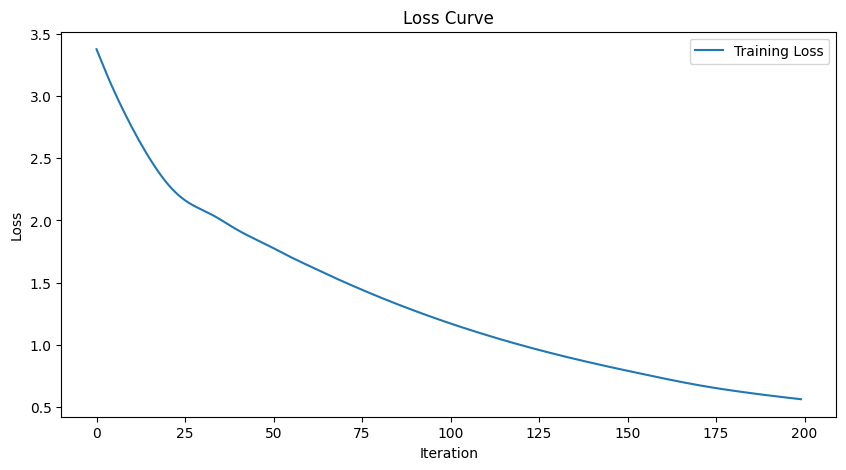

Mean Squared Error: 0.115
Coverage Probability: 0.917
Interval Score: 2.102


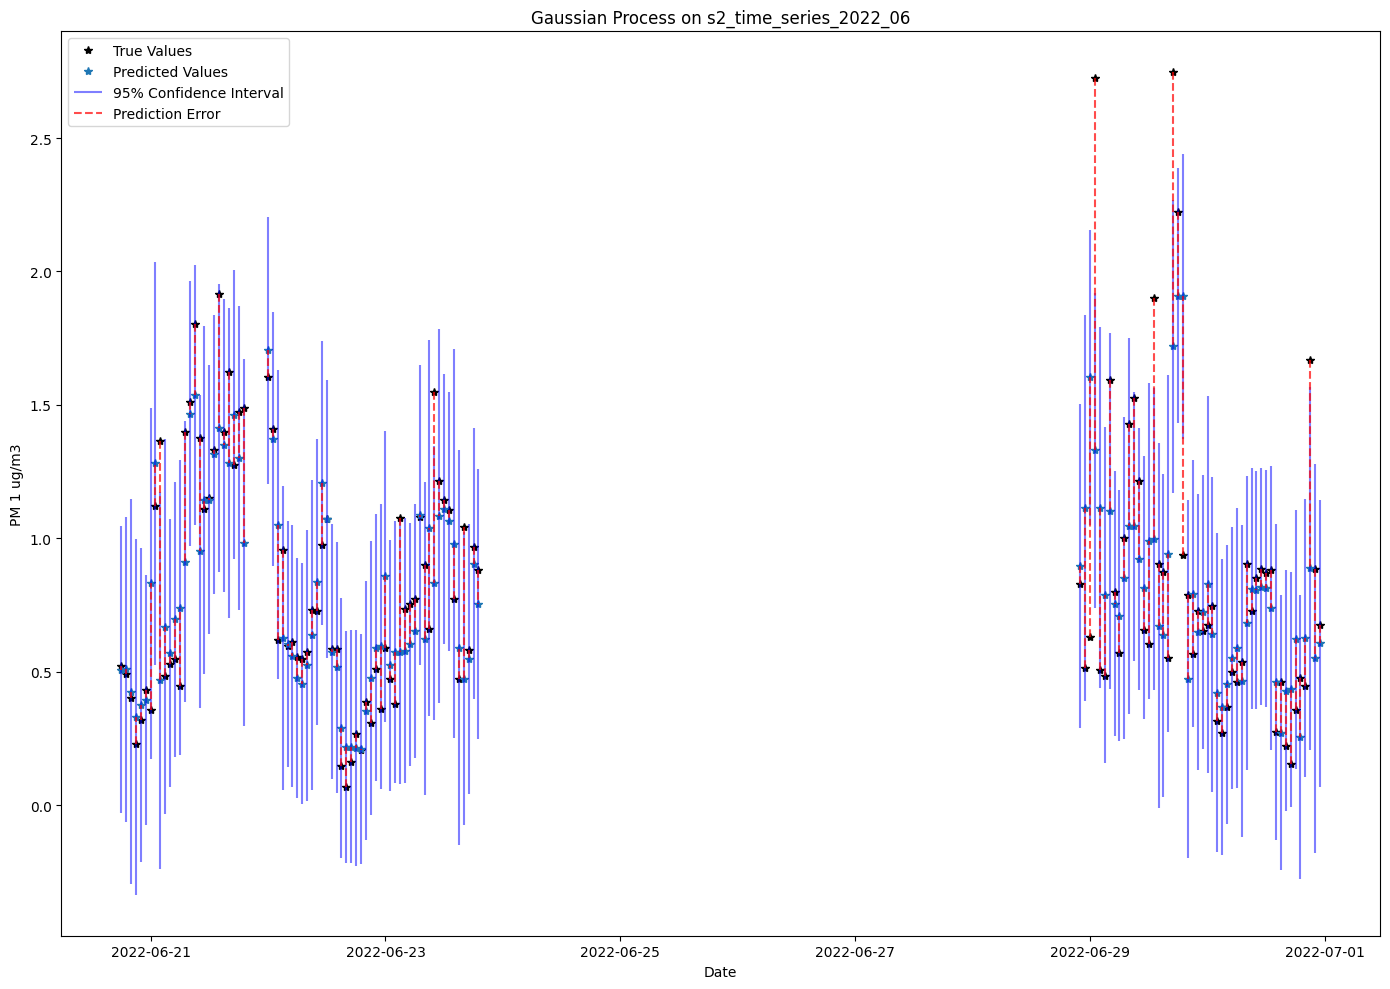

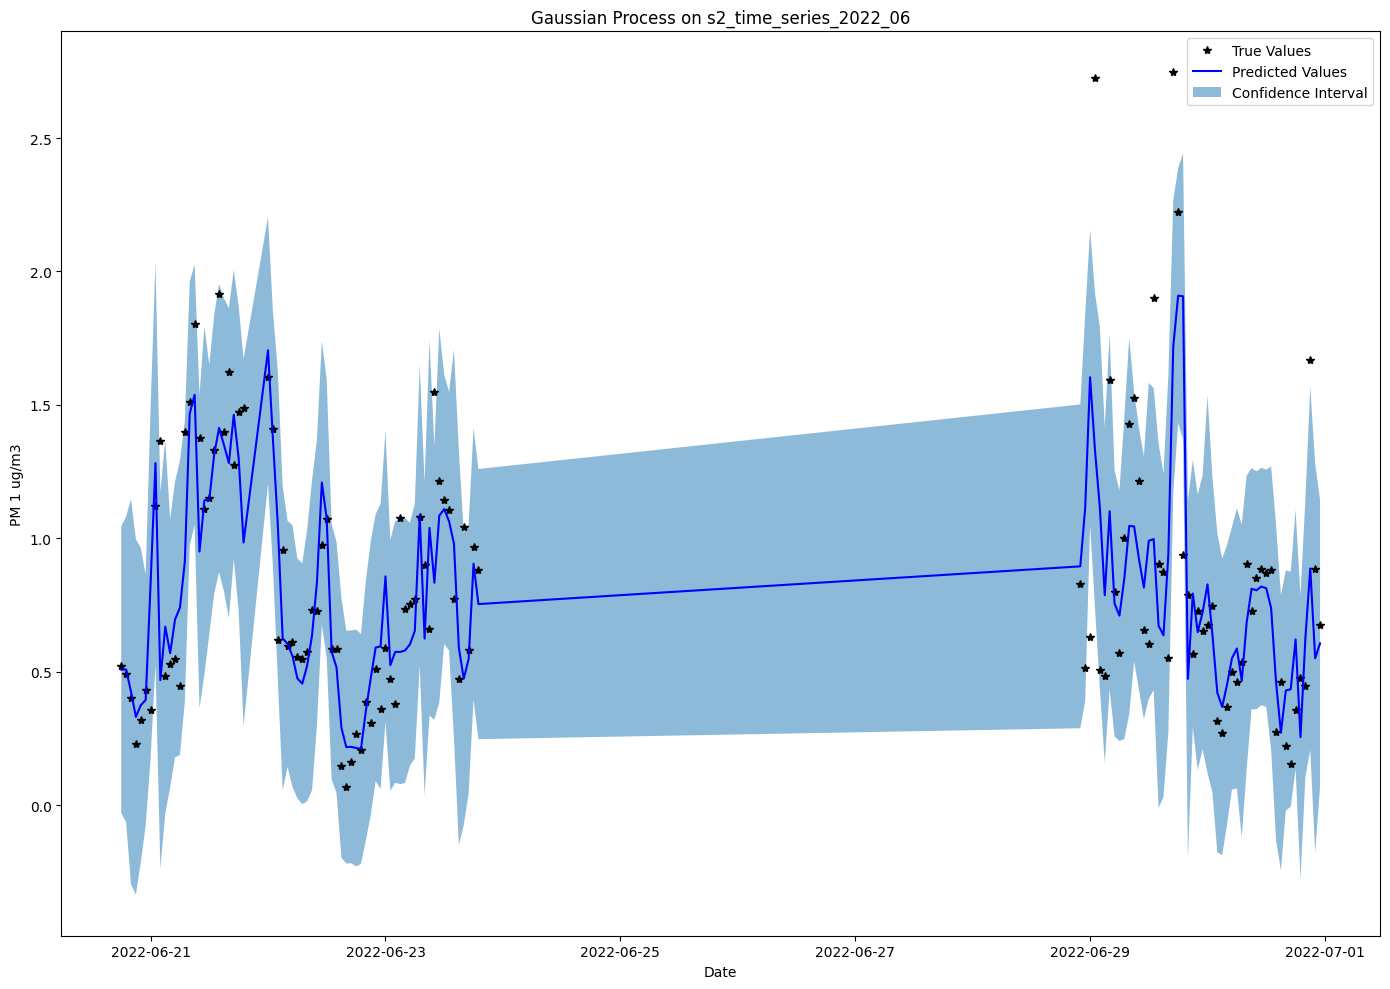

 
GP on s2 time series 2022 07 log_normalized data 50% test and train on both sets


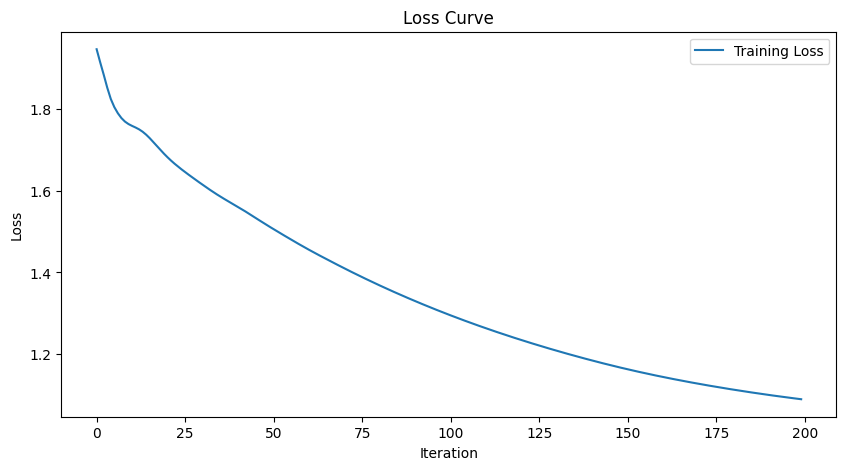

Mean Squared Error: 0.462
Coverage Probability: 0.935
Interval Score: 3.392


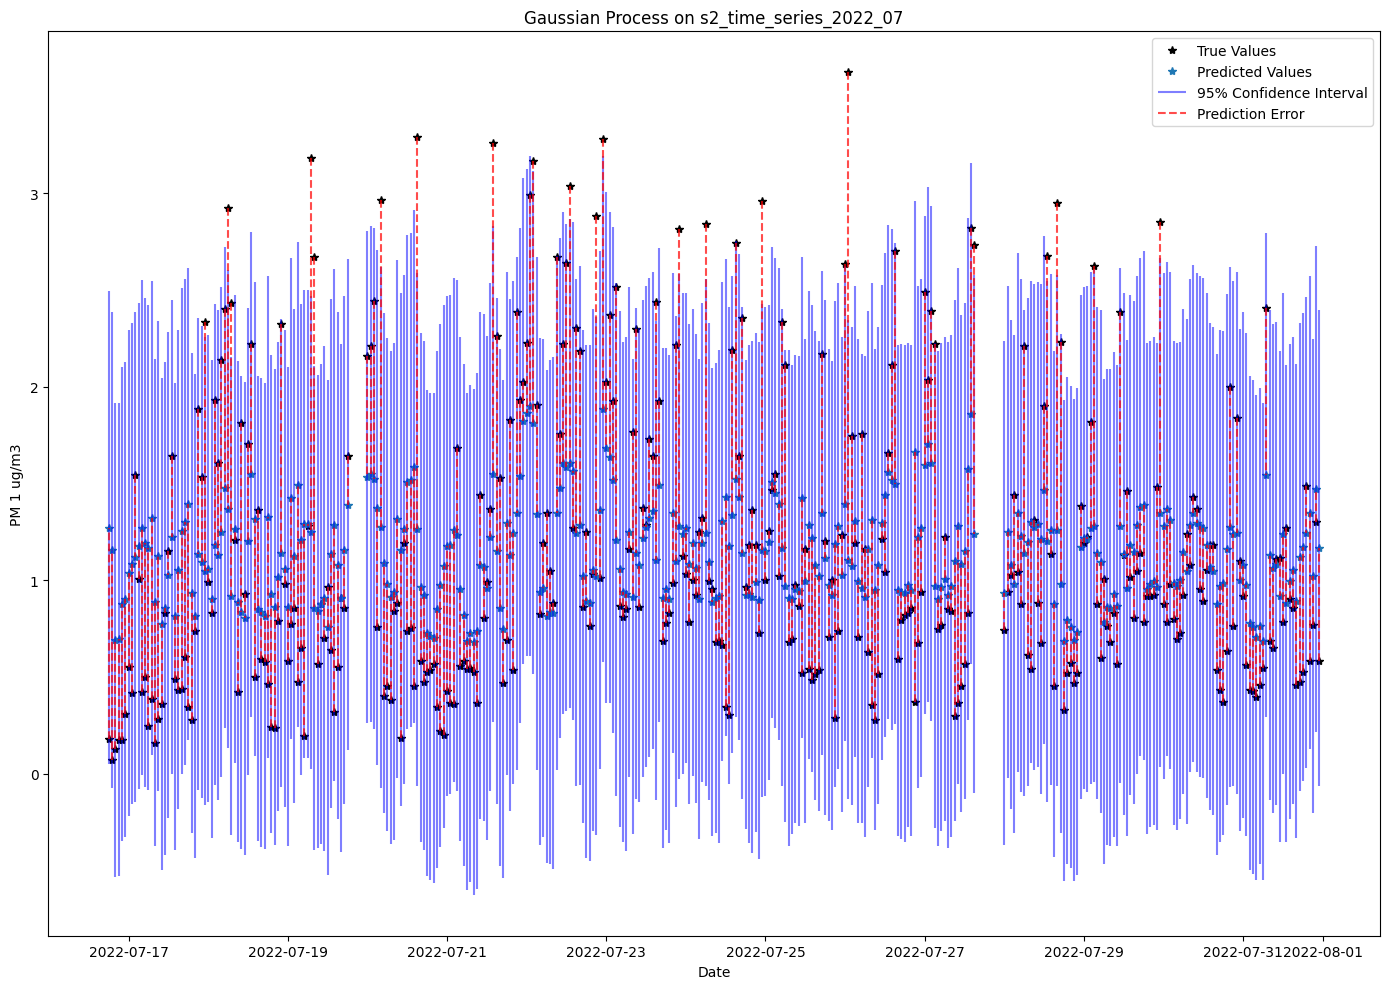

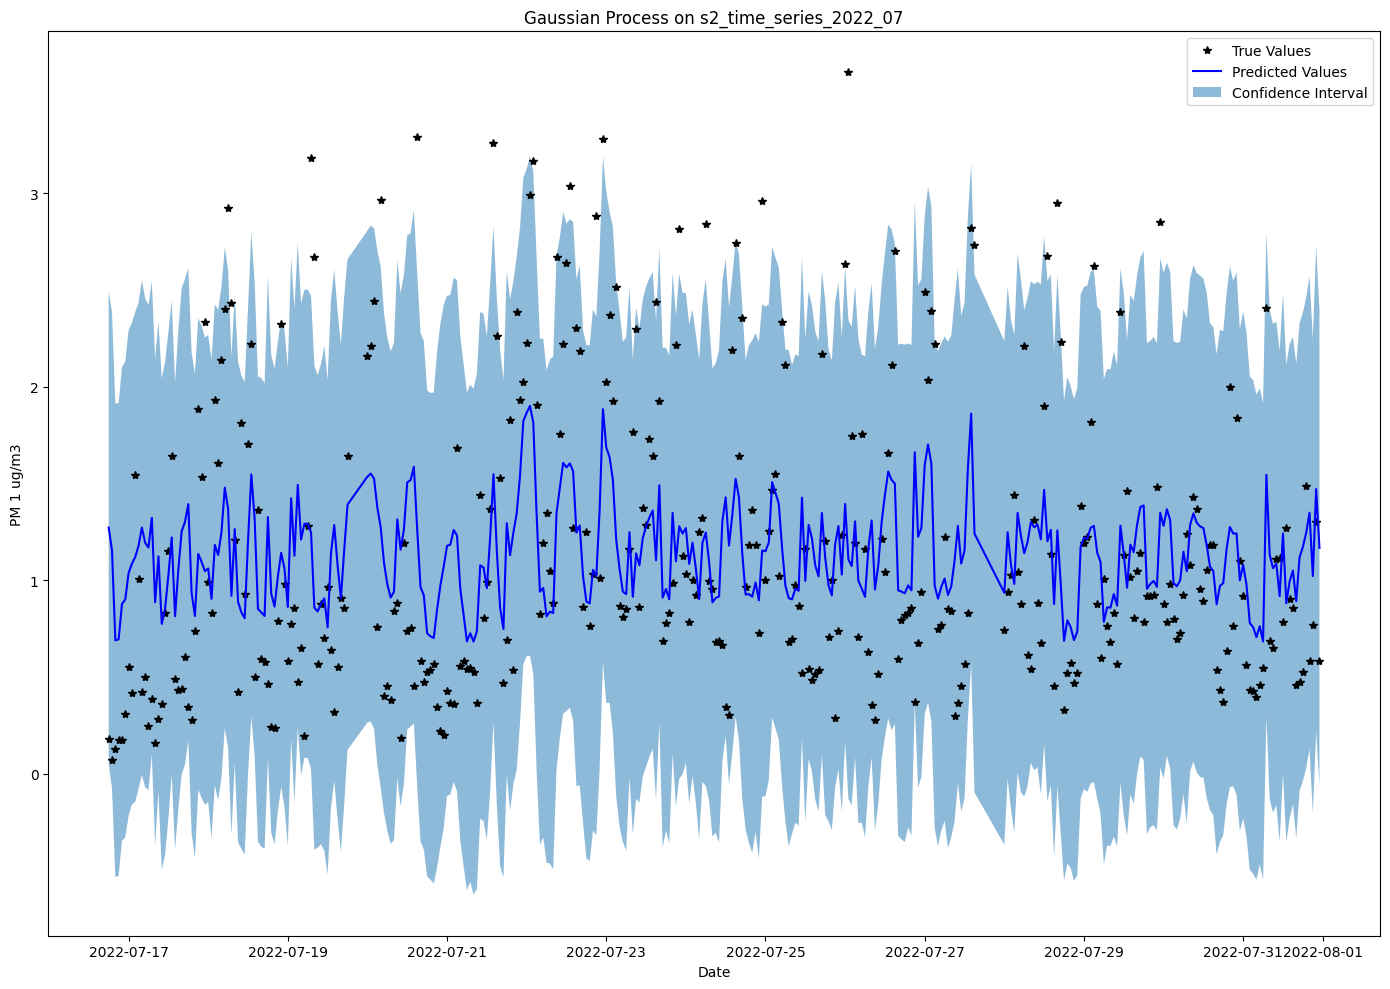

 
GP on s2 time series 2022 08 log_normalized data 50% test and train on both sets


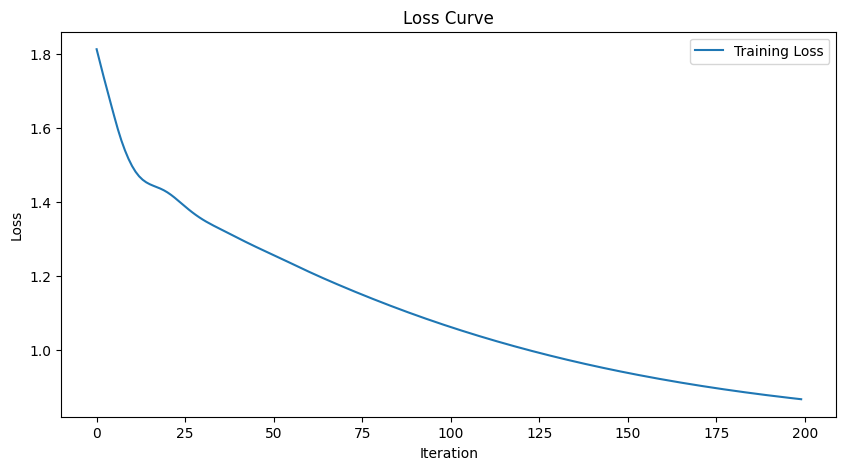

Mean Squared Error: 0.217
Coverage Probability: 0.957
Interval Score: 2.360


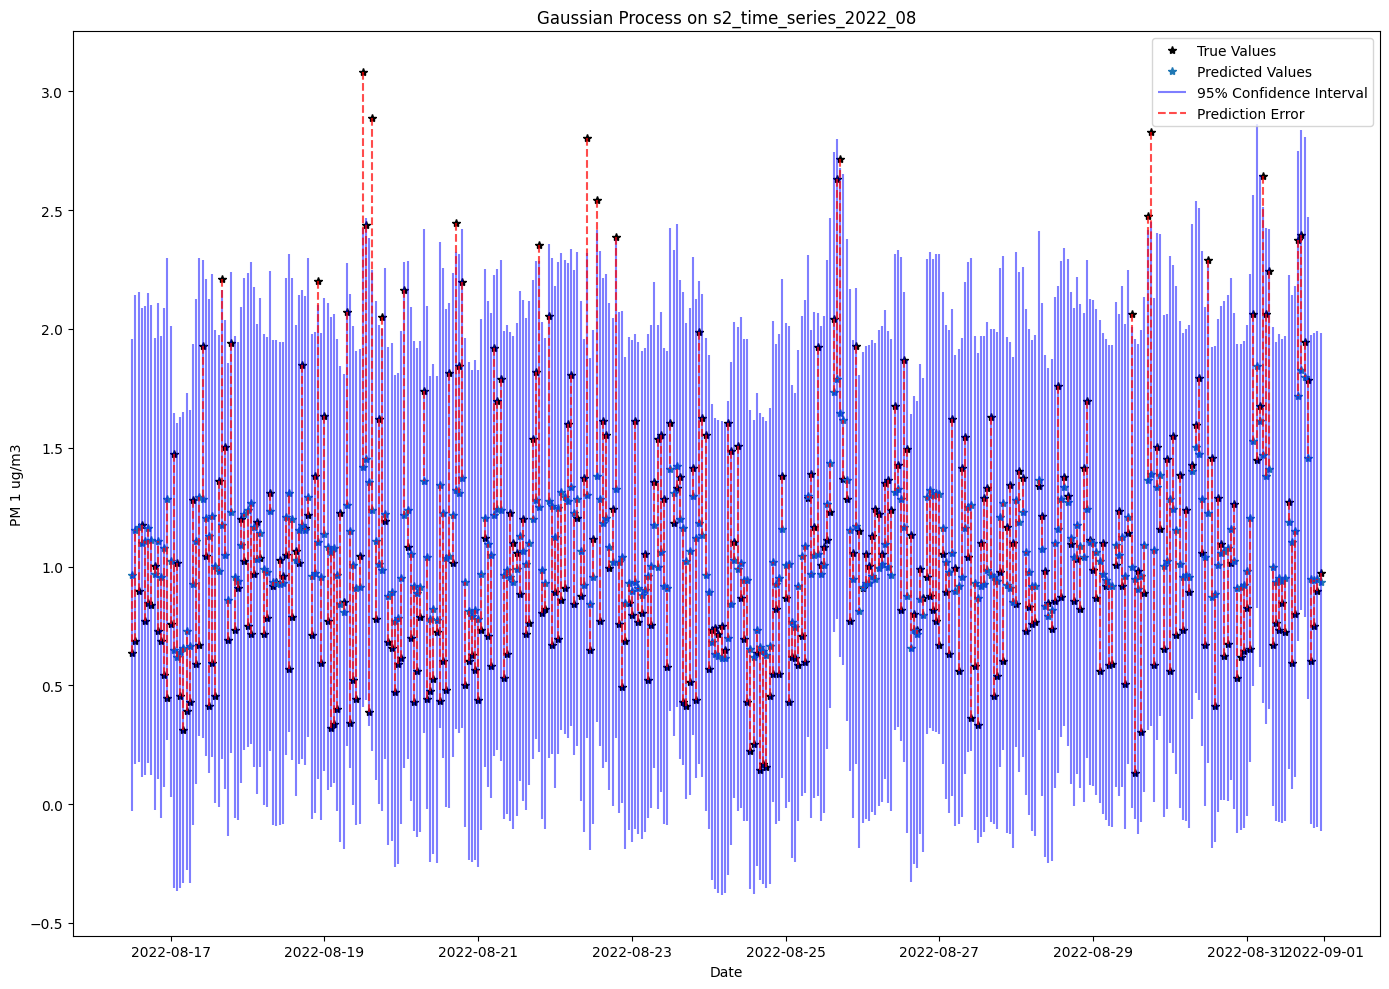

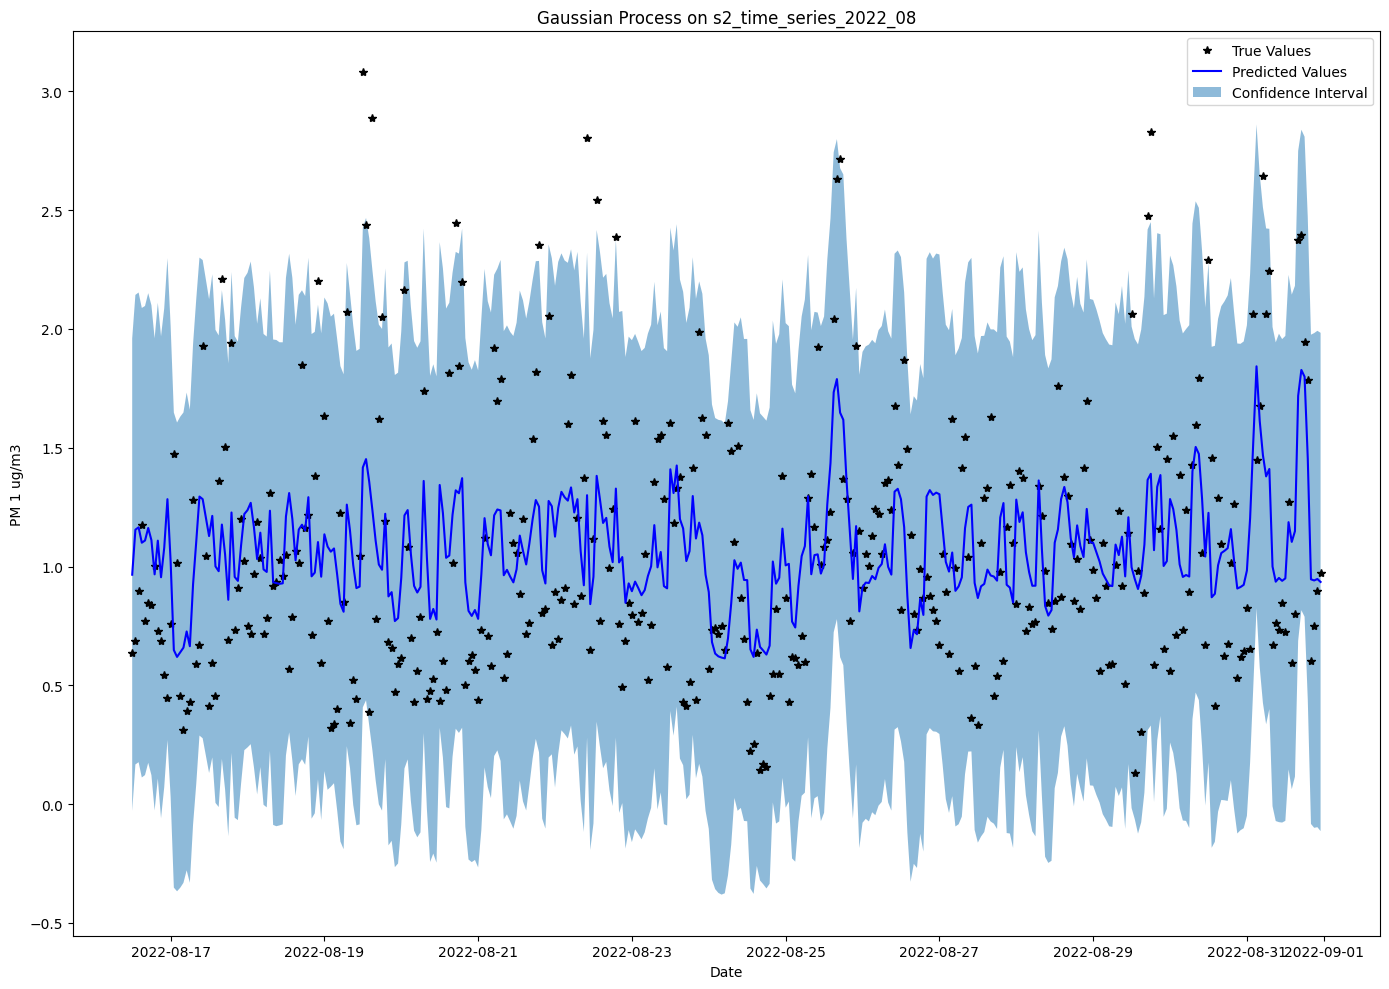

 
GP on s2 time series 2022 09 log_normalized data 50% test and train on both sets


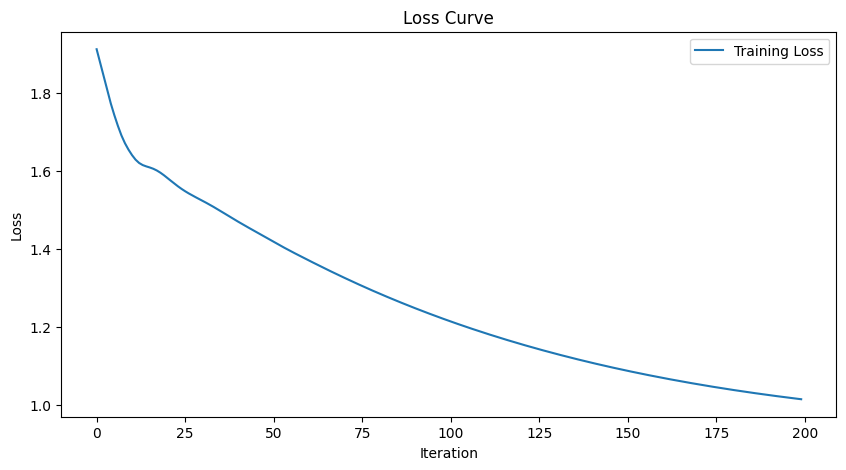

Mean Squared Error: 0.336
Coverage Probability: 0.939
Interval Score: 3.047


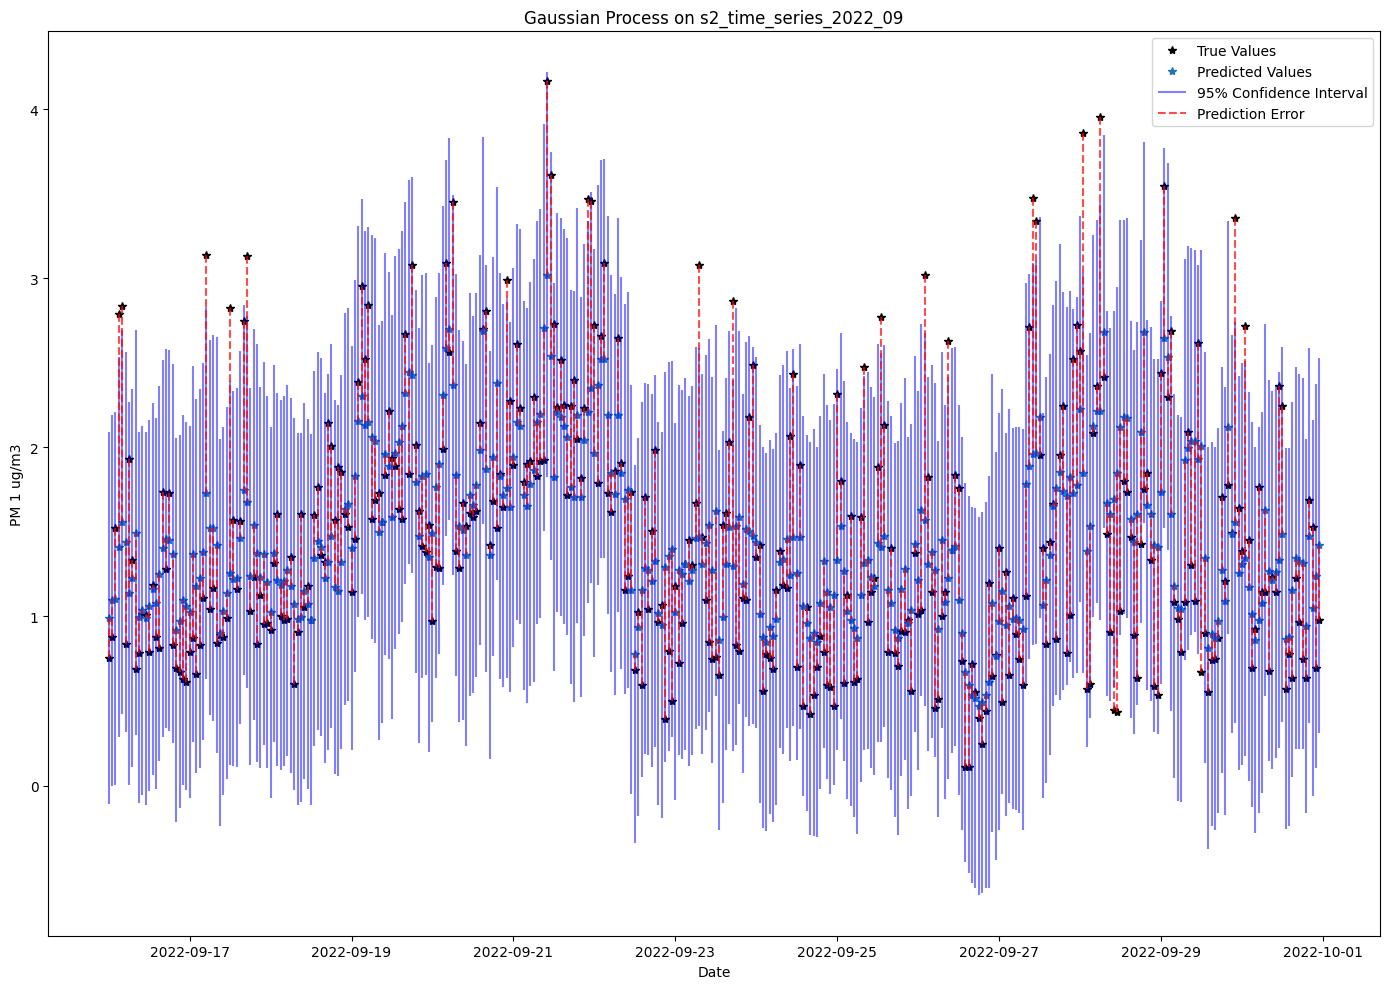

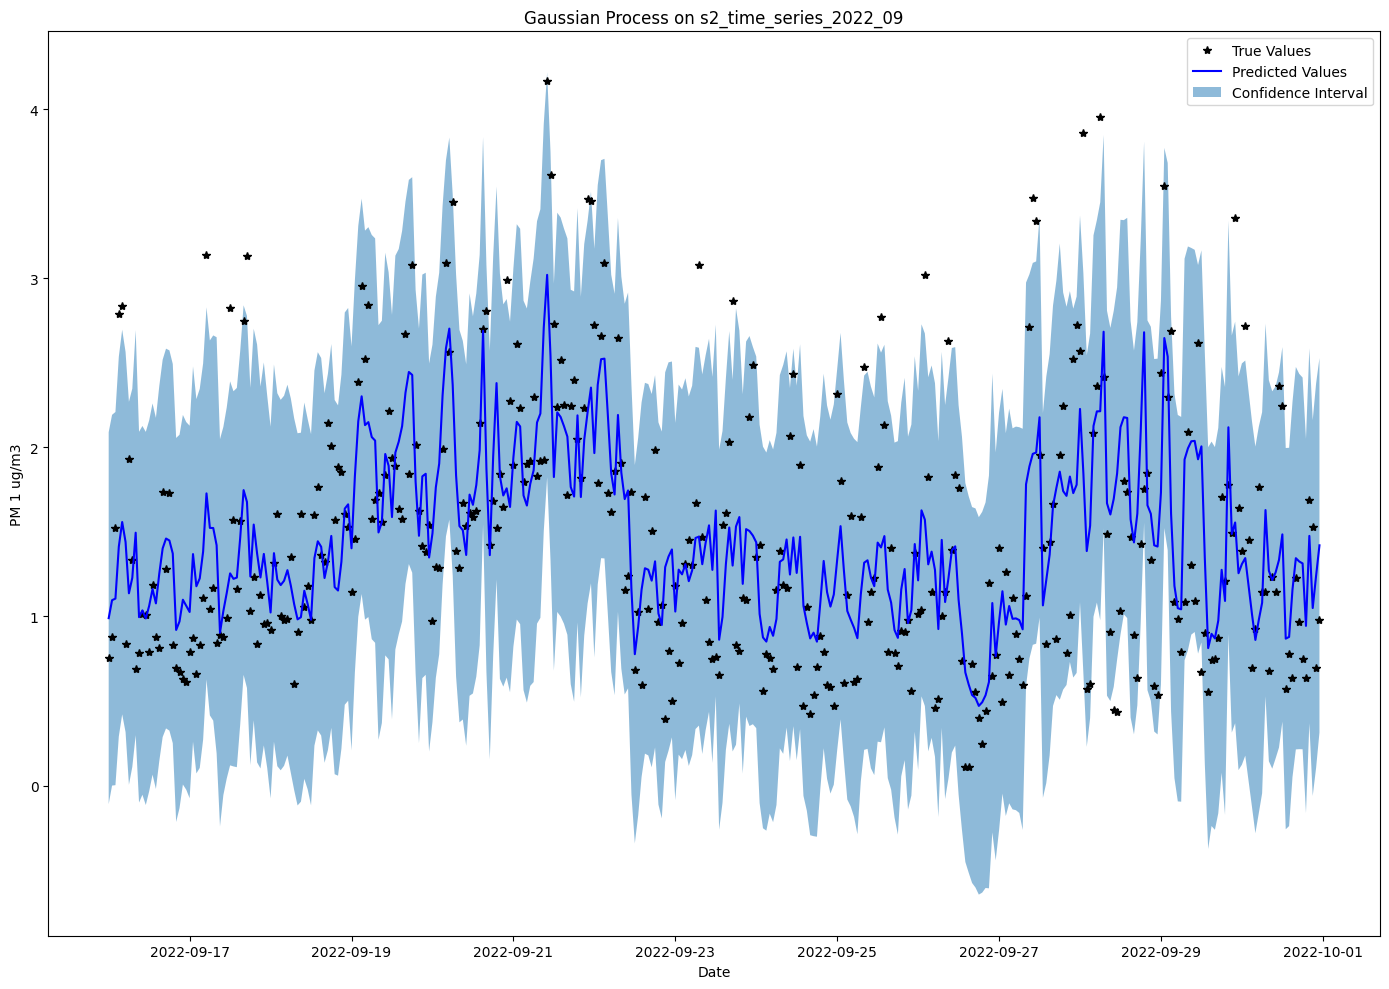

 
GP on s2 time series 2022 10 log_normalized data 50% test and train on both sets


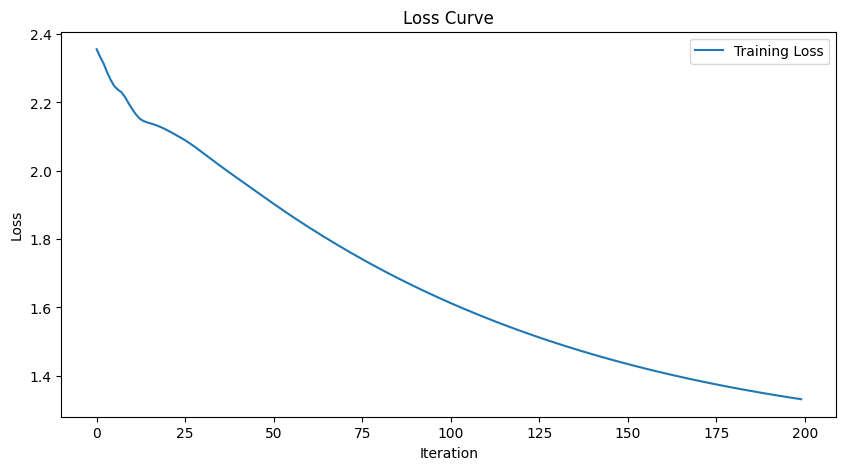

Mean Squared Error: 0.449
Coverage Probability: 0.974
Interval Score: 3.272


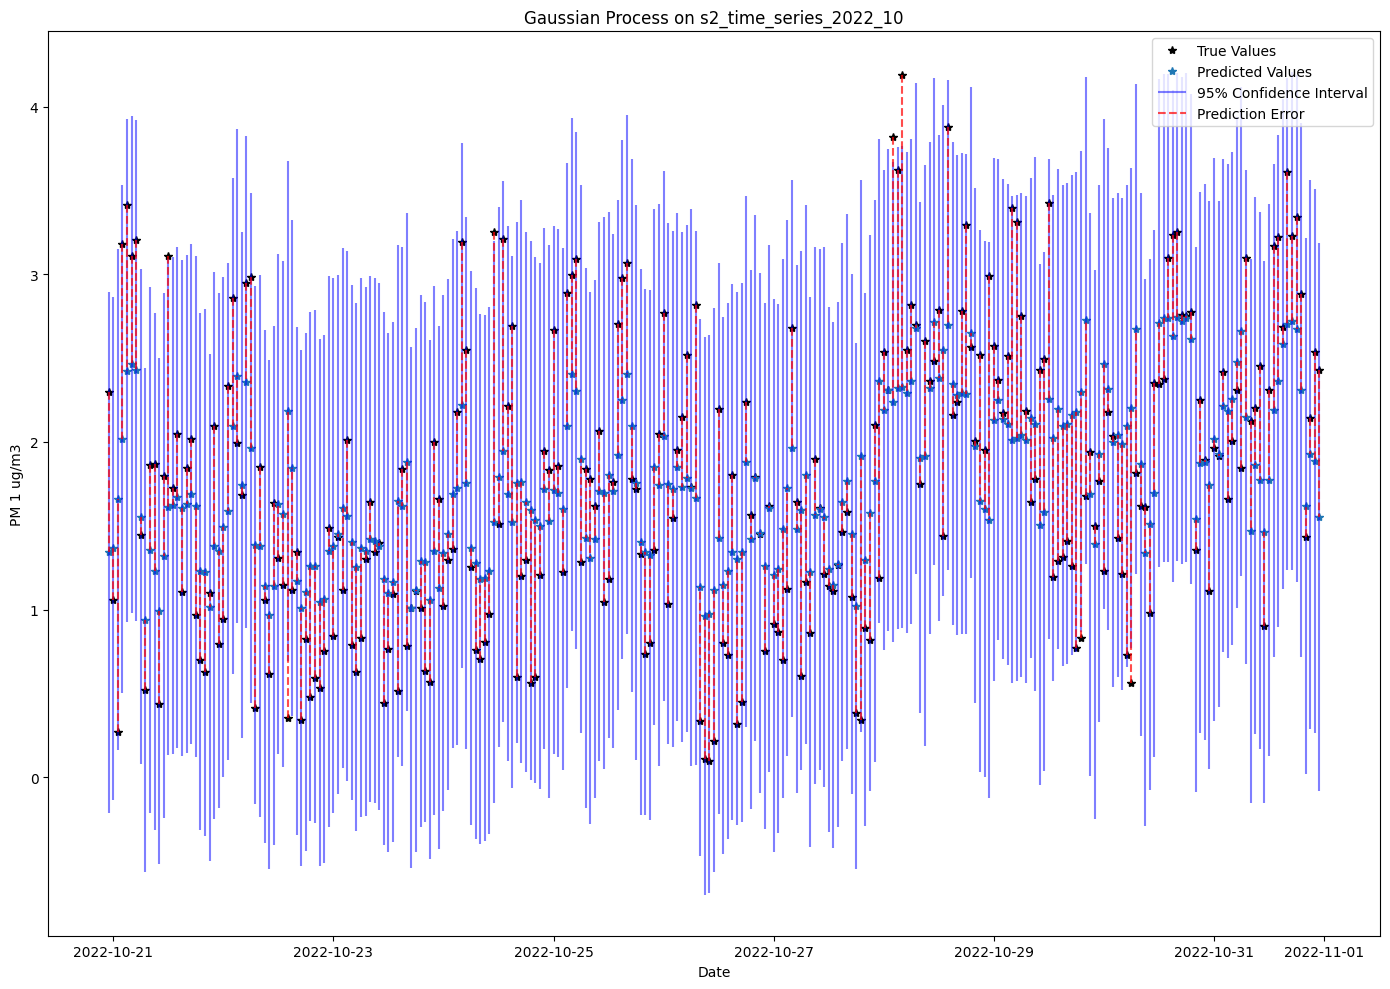

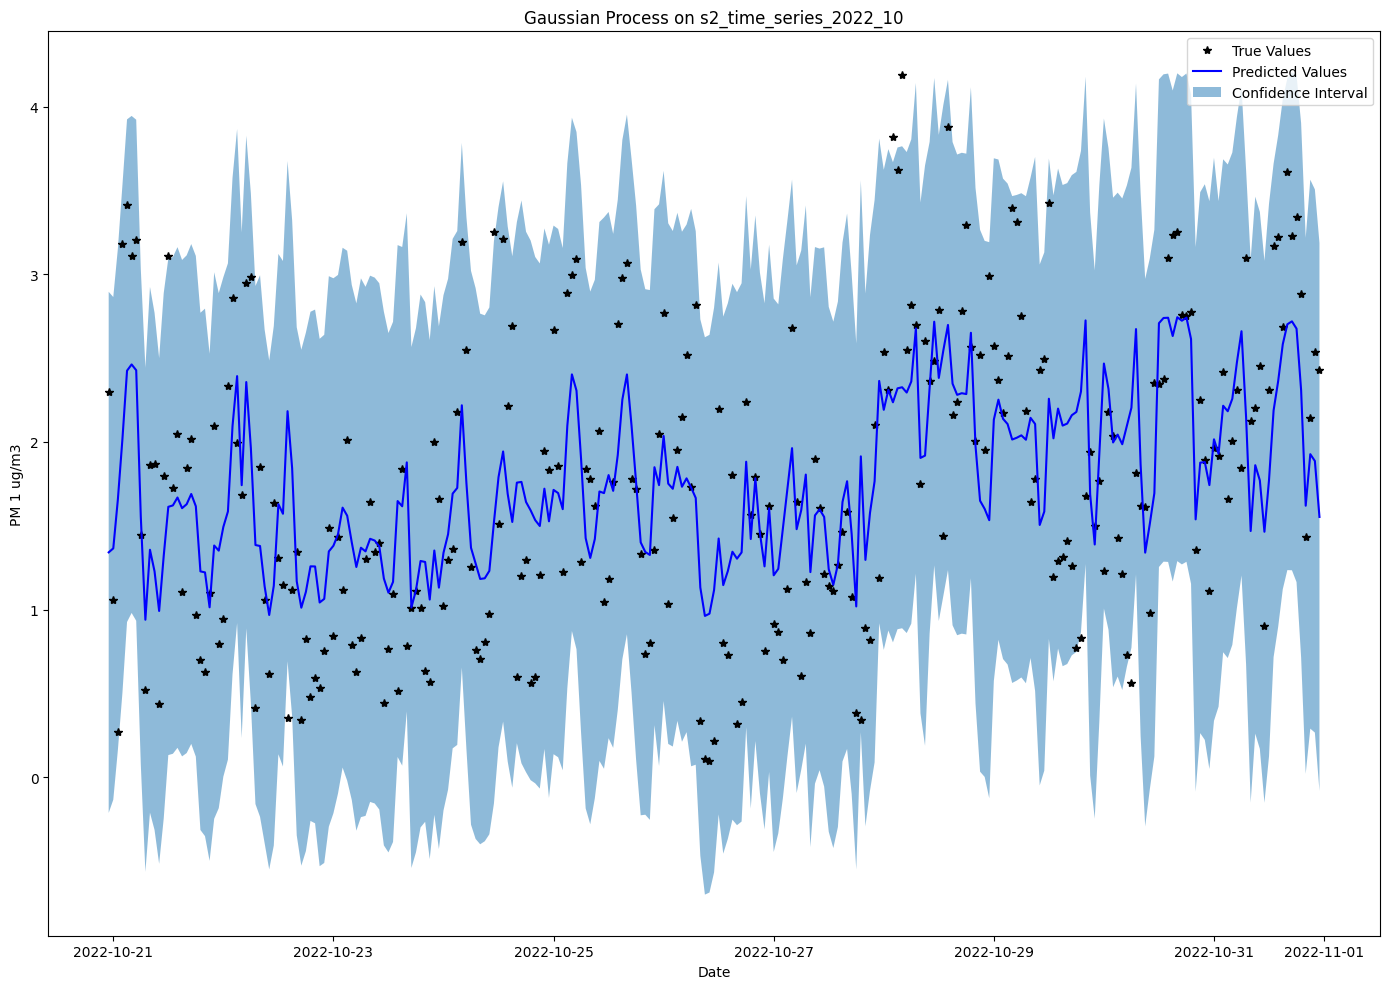

 
GP on s2 time series 2022 11 log_normalized data 50% test and train on both sets


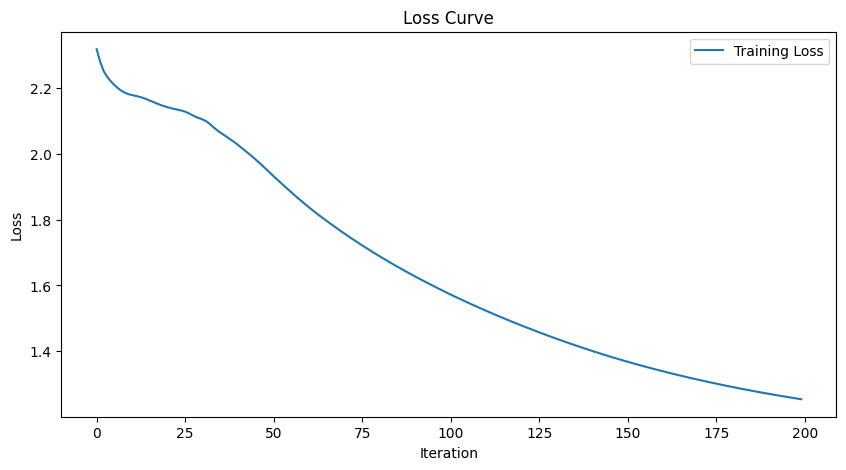

Mean Squared Error: 0.441
Coverage Probability: 0.965
Interval Score: 3.058


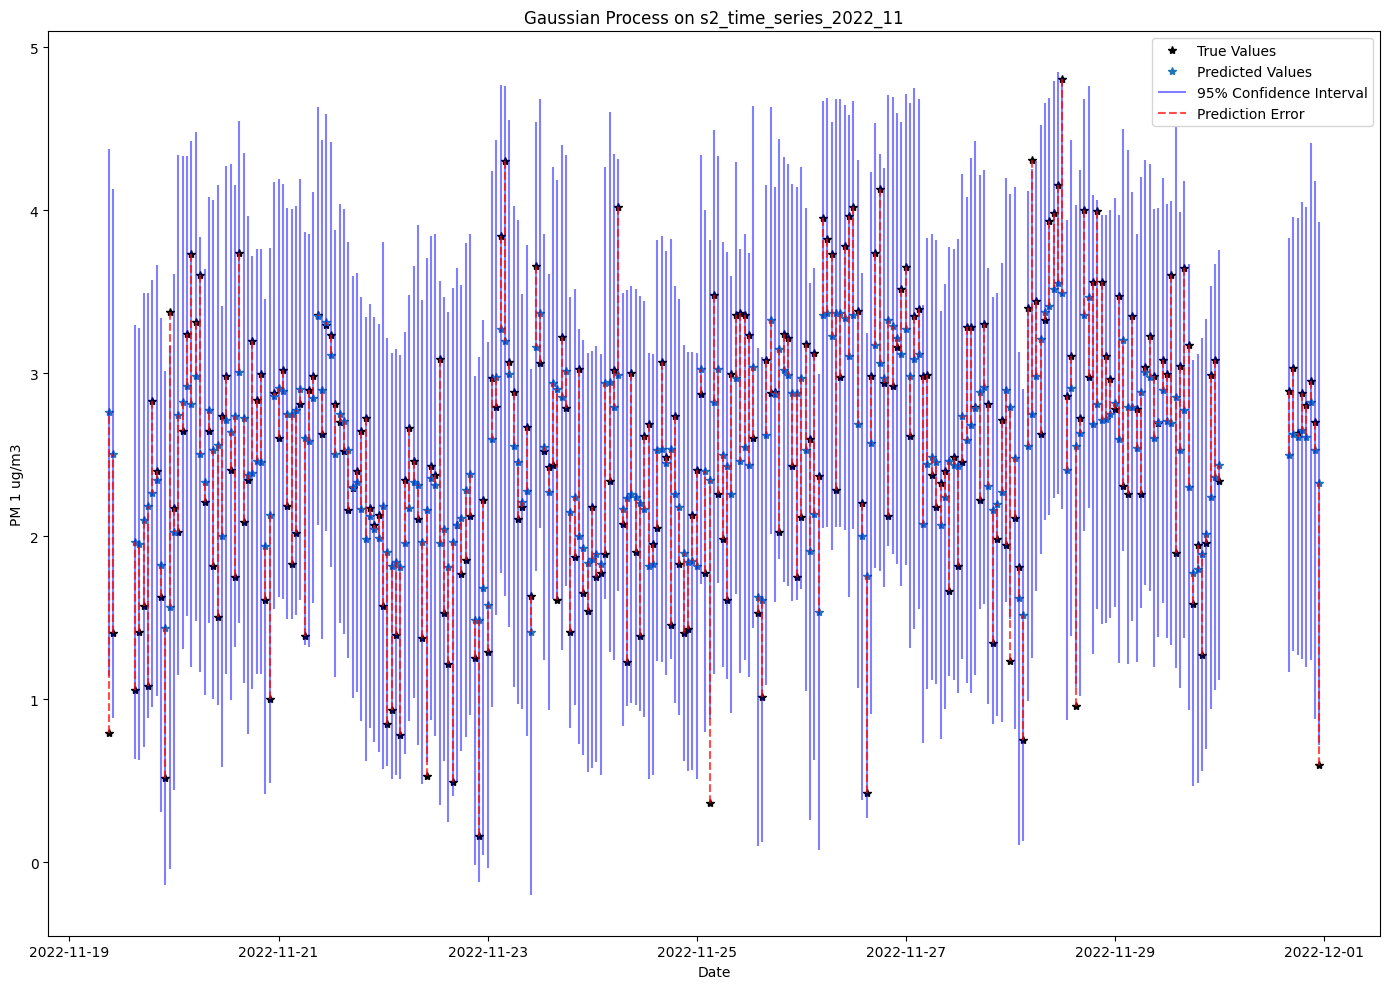

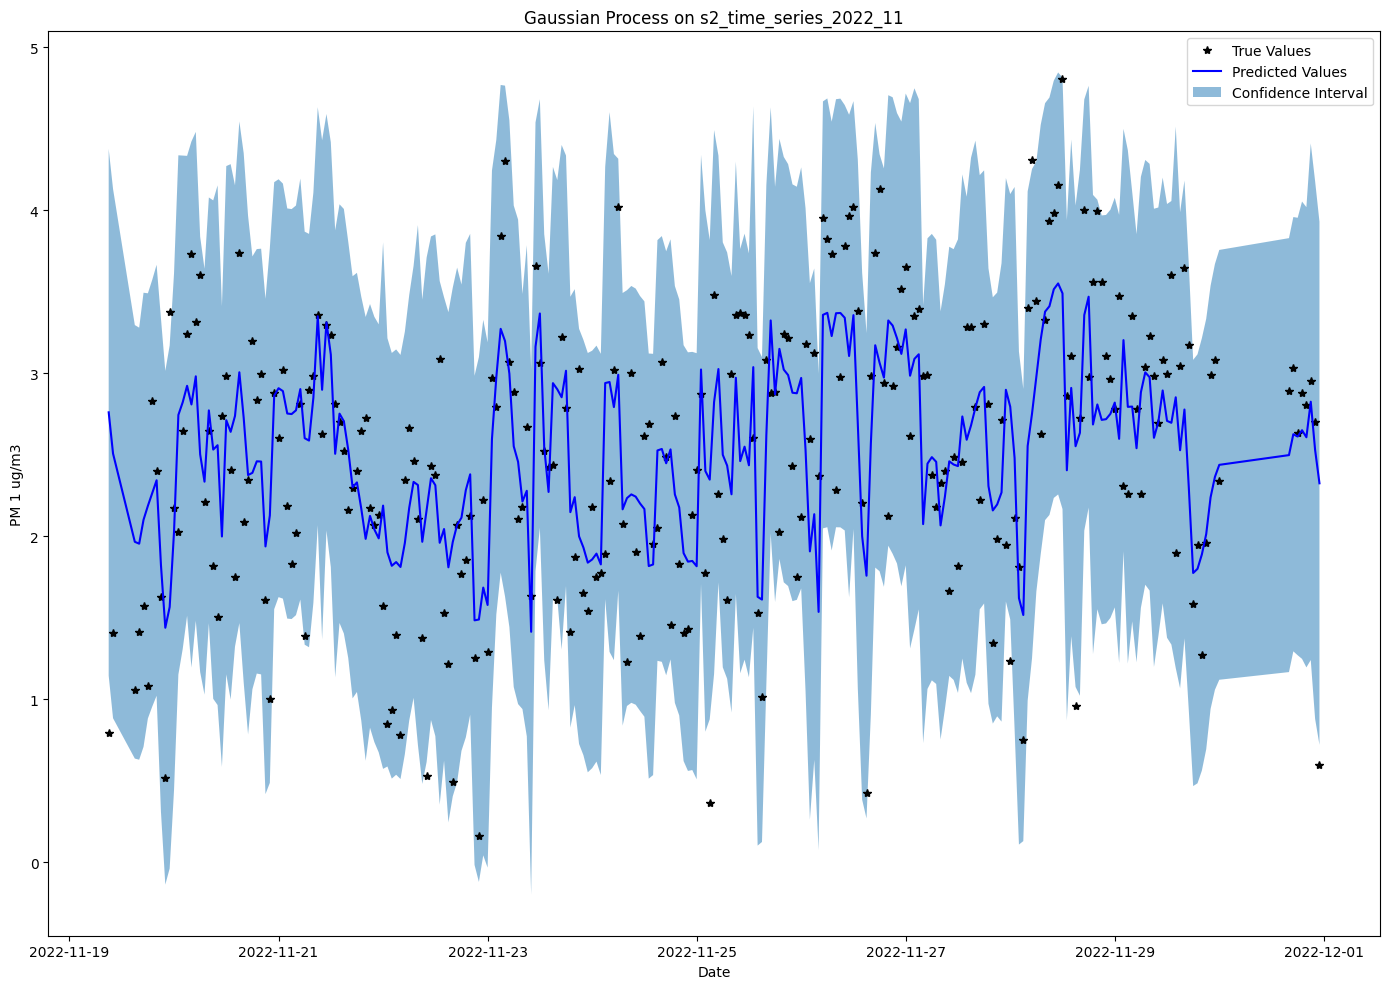

 
GP on s2 time series 2022 12 log_normalized data 50% test and train on both sets


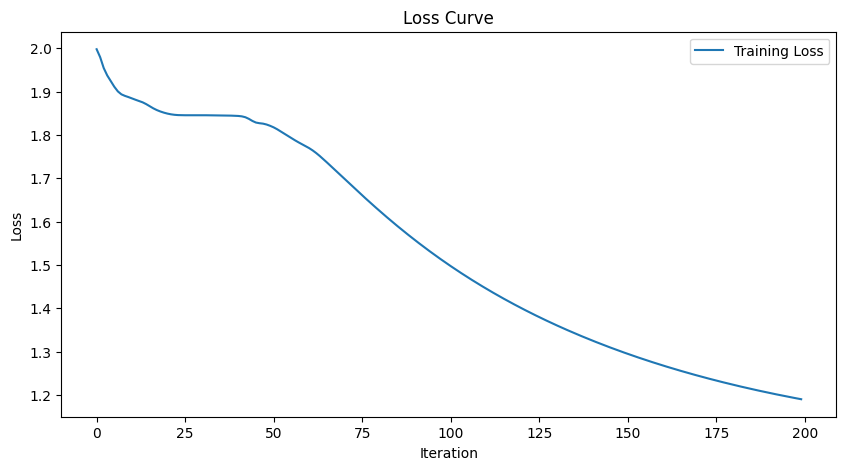

Mean Squared Error: 0.463
Coverage Probability: 0.956
Interval Score: 3.114


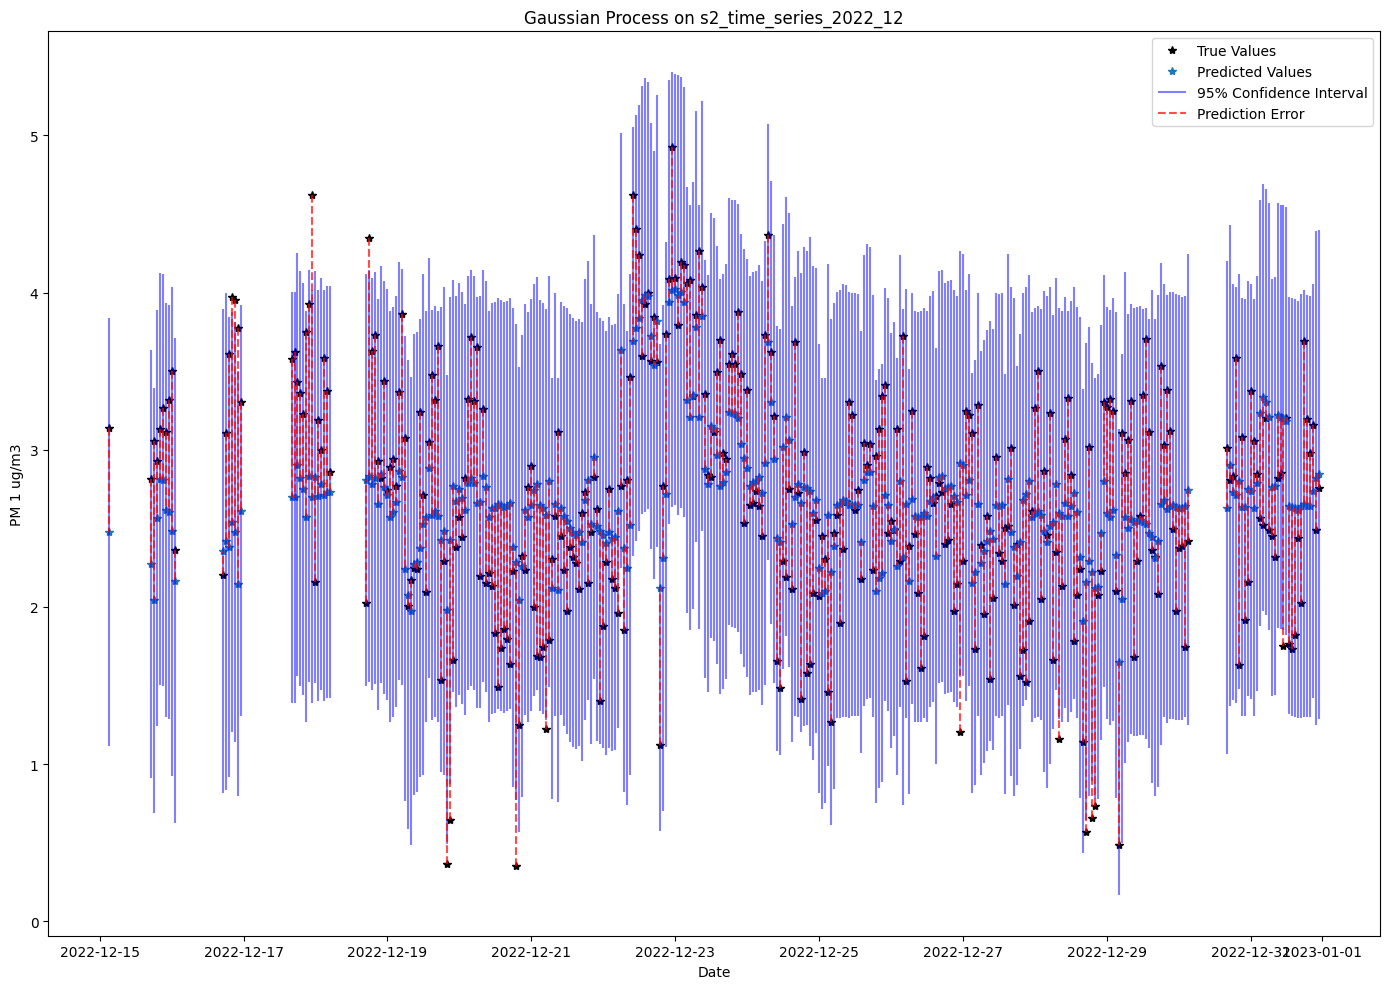

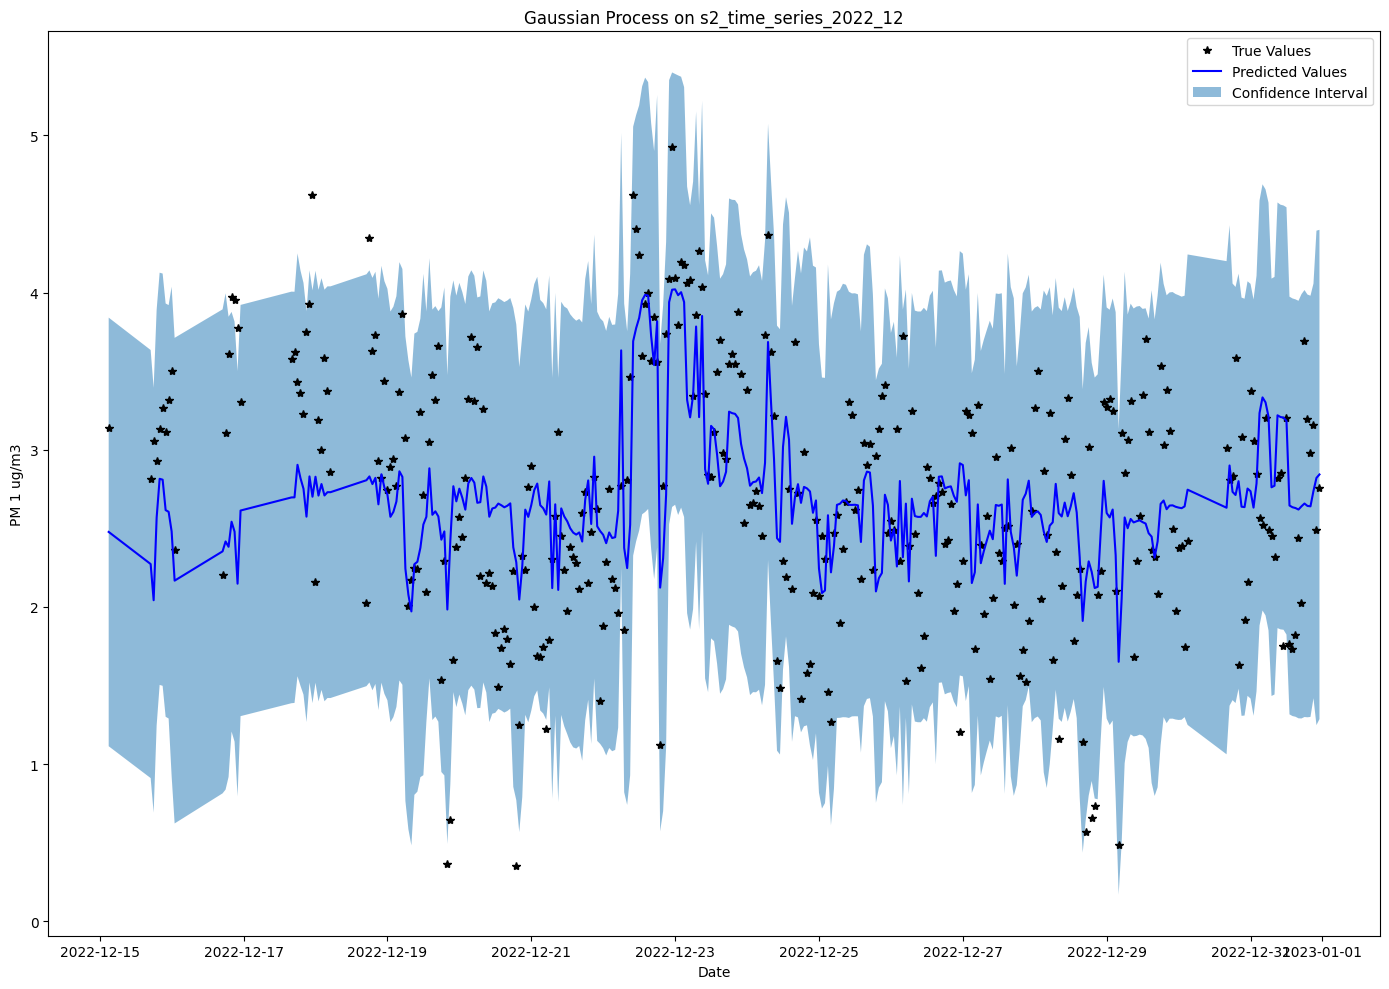

 
GP on s2 time series 2023 01 log_normalized data 50% test and train on both sets


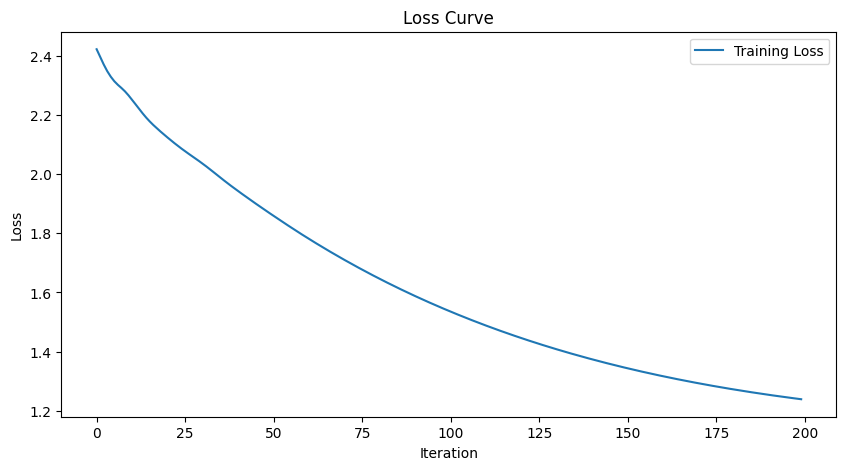

Mean Squared Error: 0.527
Coverage Probability: 0.969
Interval Score: 3.184


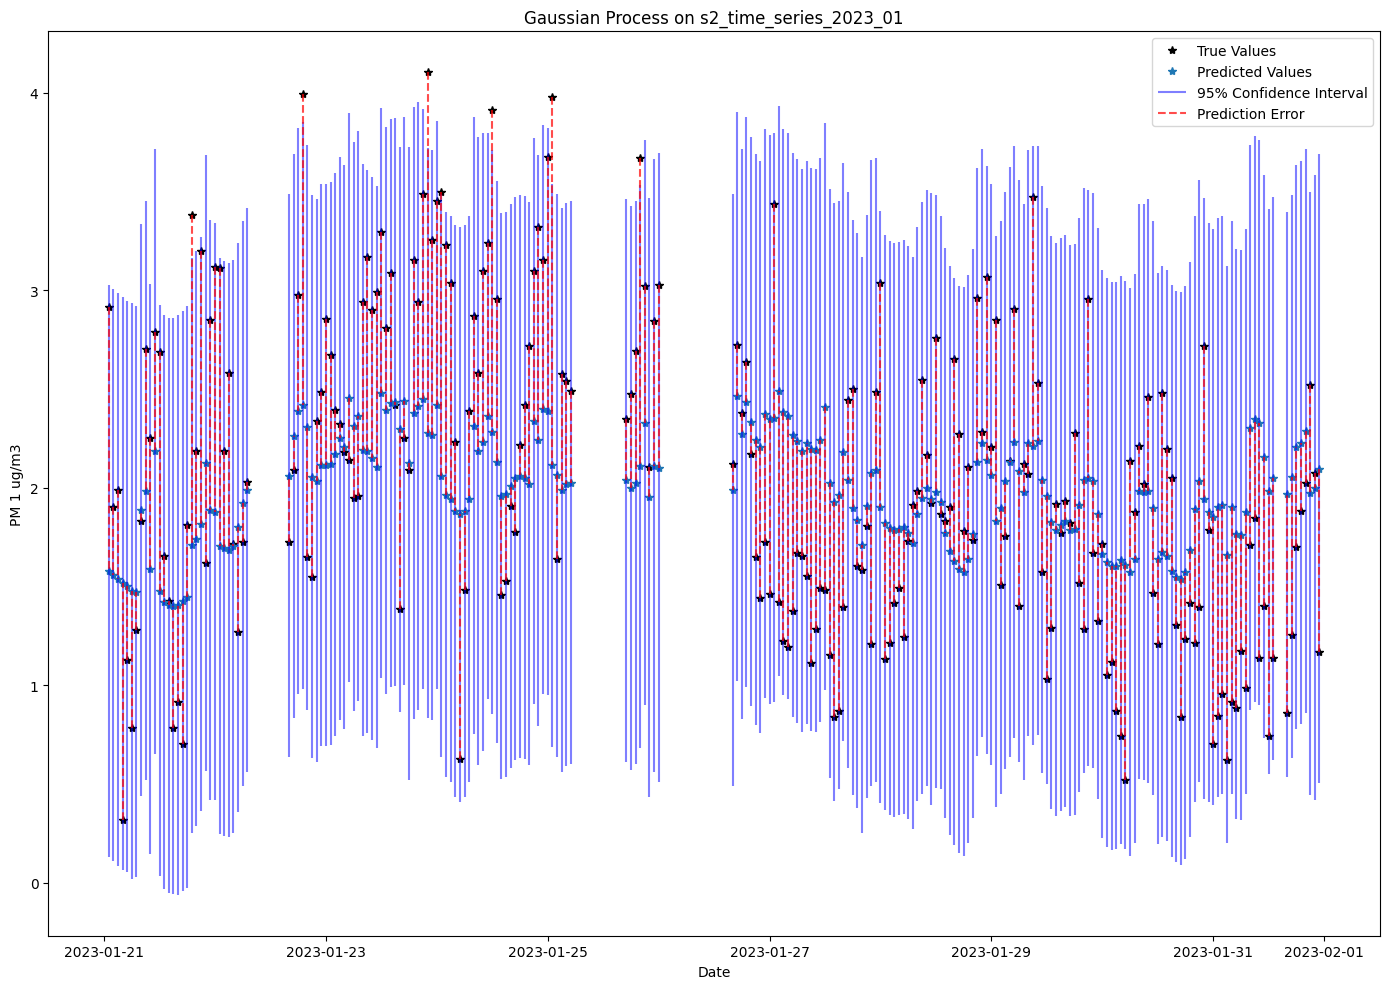

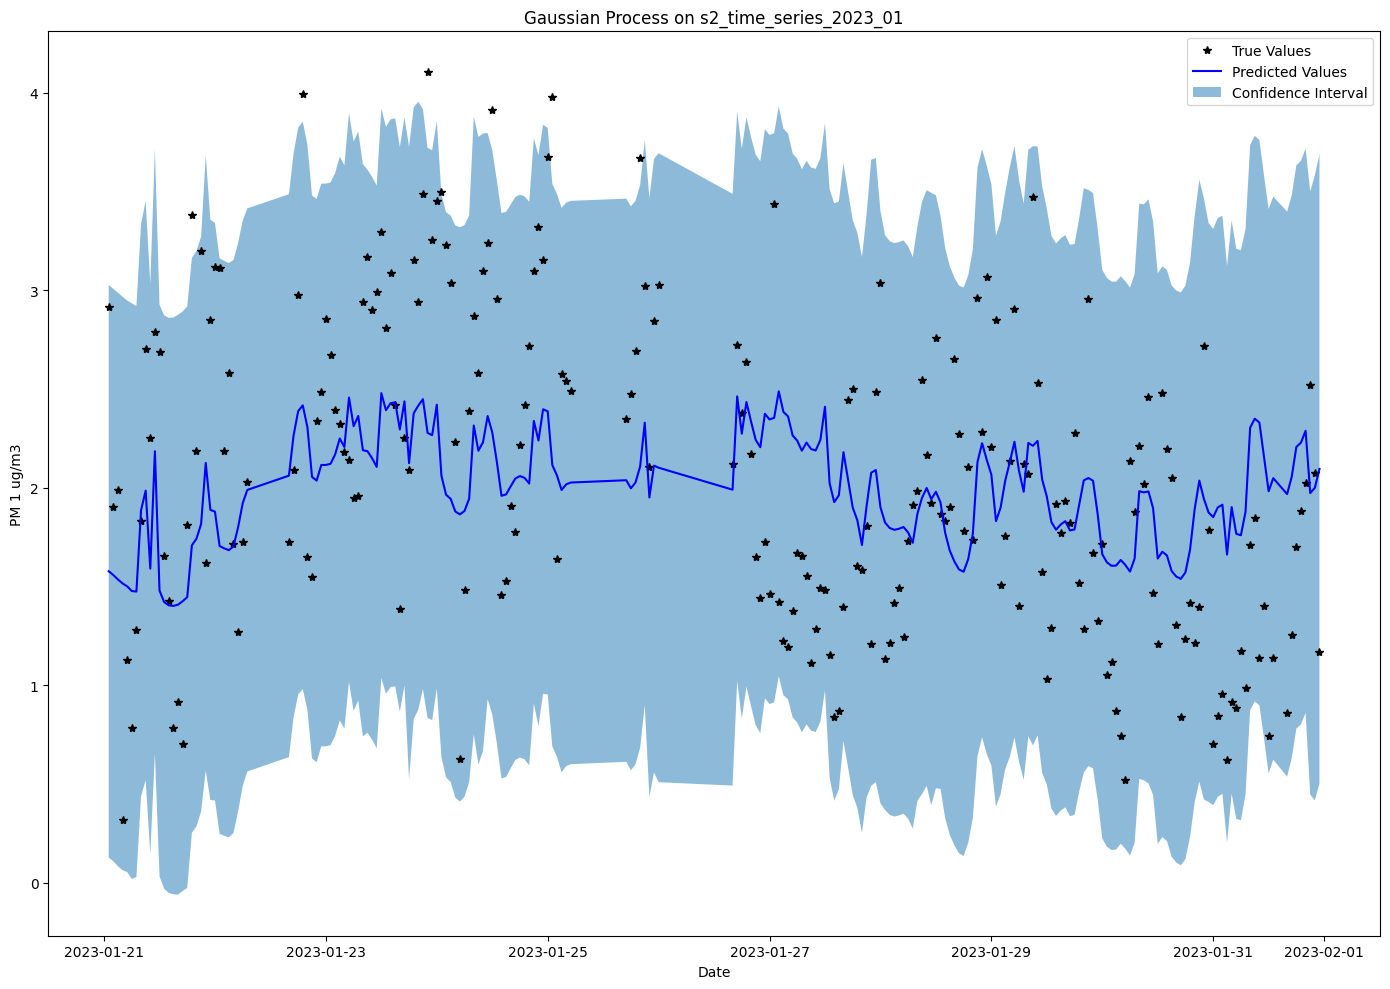

 
GP on s2 time series 2023 02 log_normalized data 50% test and train on both sets


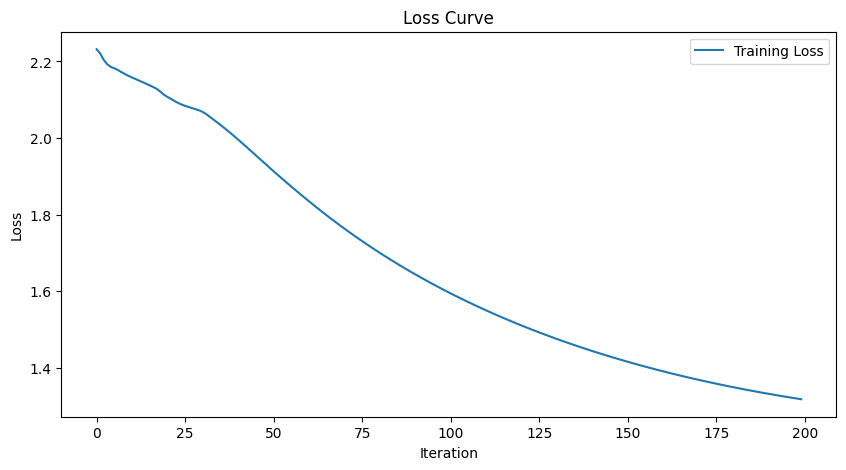

Mean Squared Error: 0.605
Coverage Probability: 0.983
Interval Score: 3.425


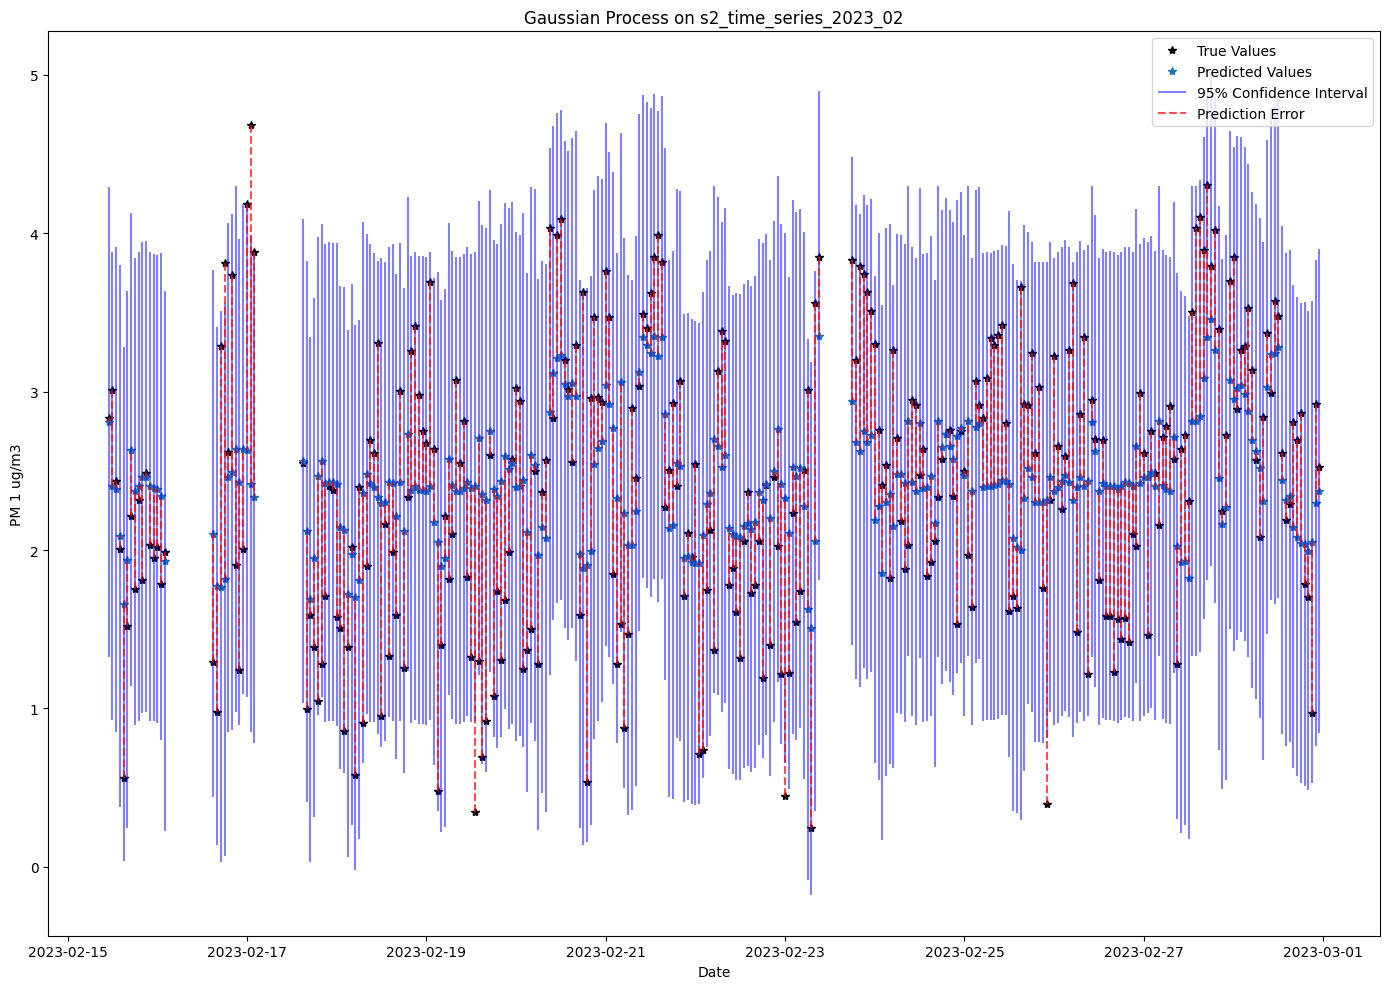

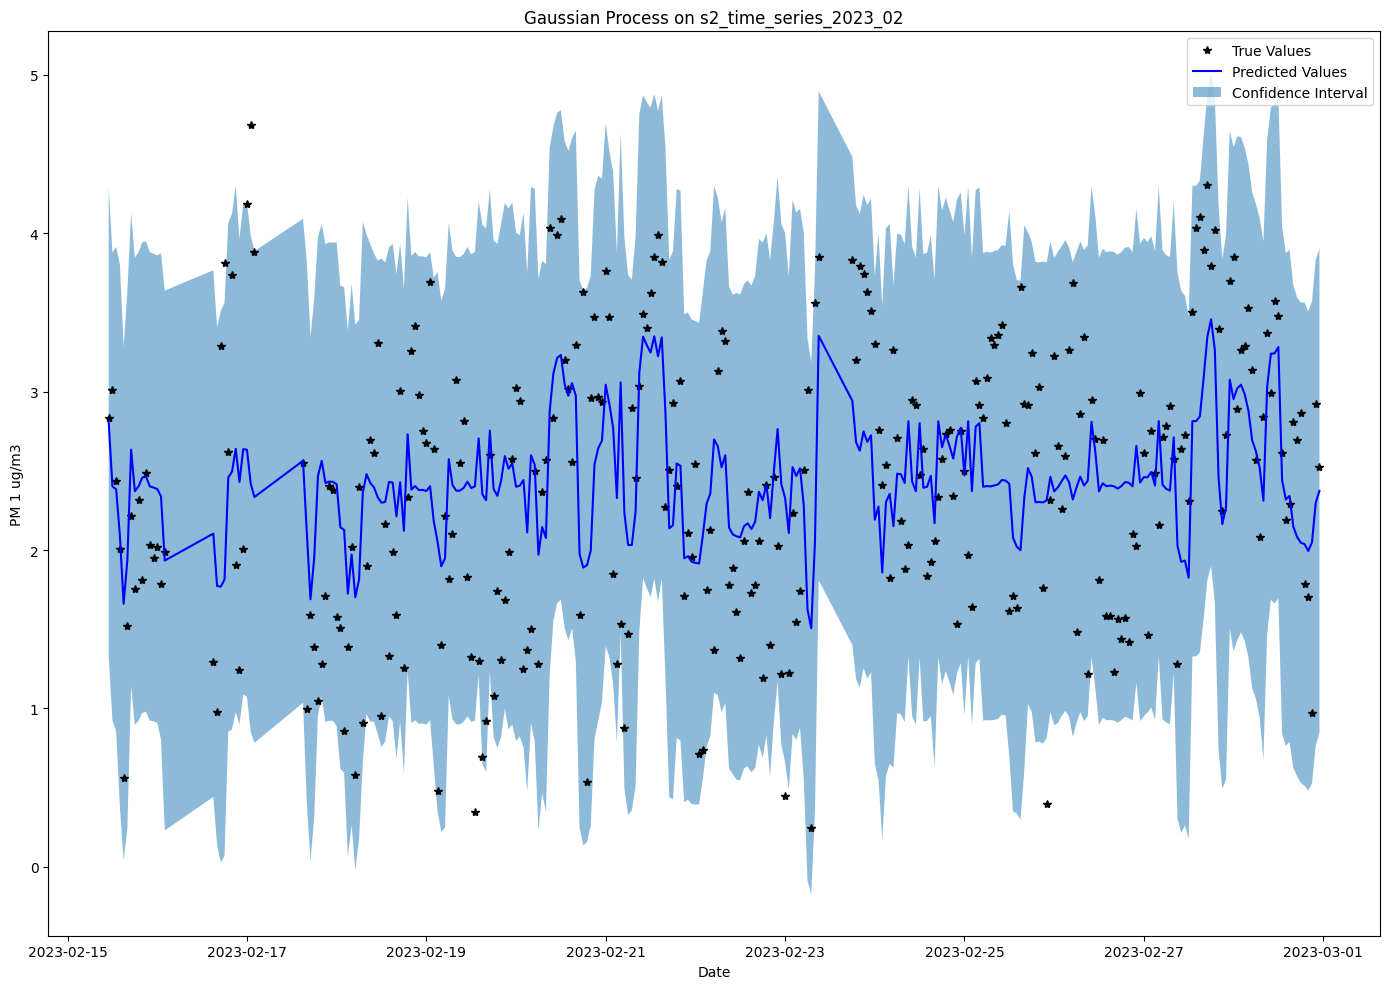

 
GP on s2 time series 2023 03 log_normalized data 50% test and train on both sets


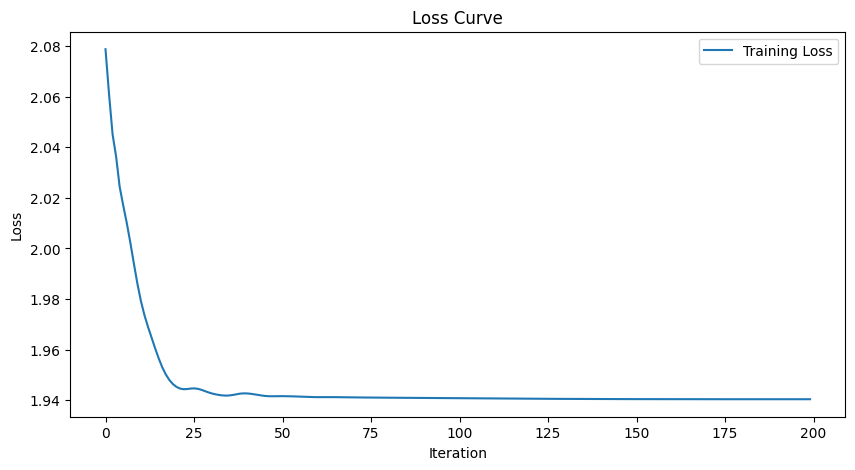

Mean Squared Error: 0.600
Coverage Probability: 0.954
Interval Score: 3.408


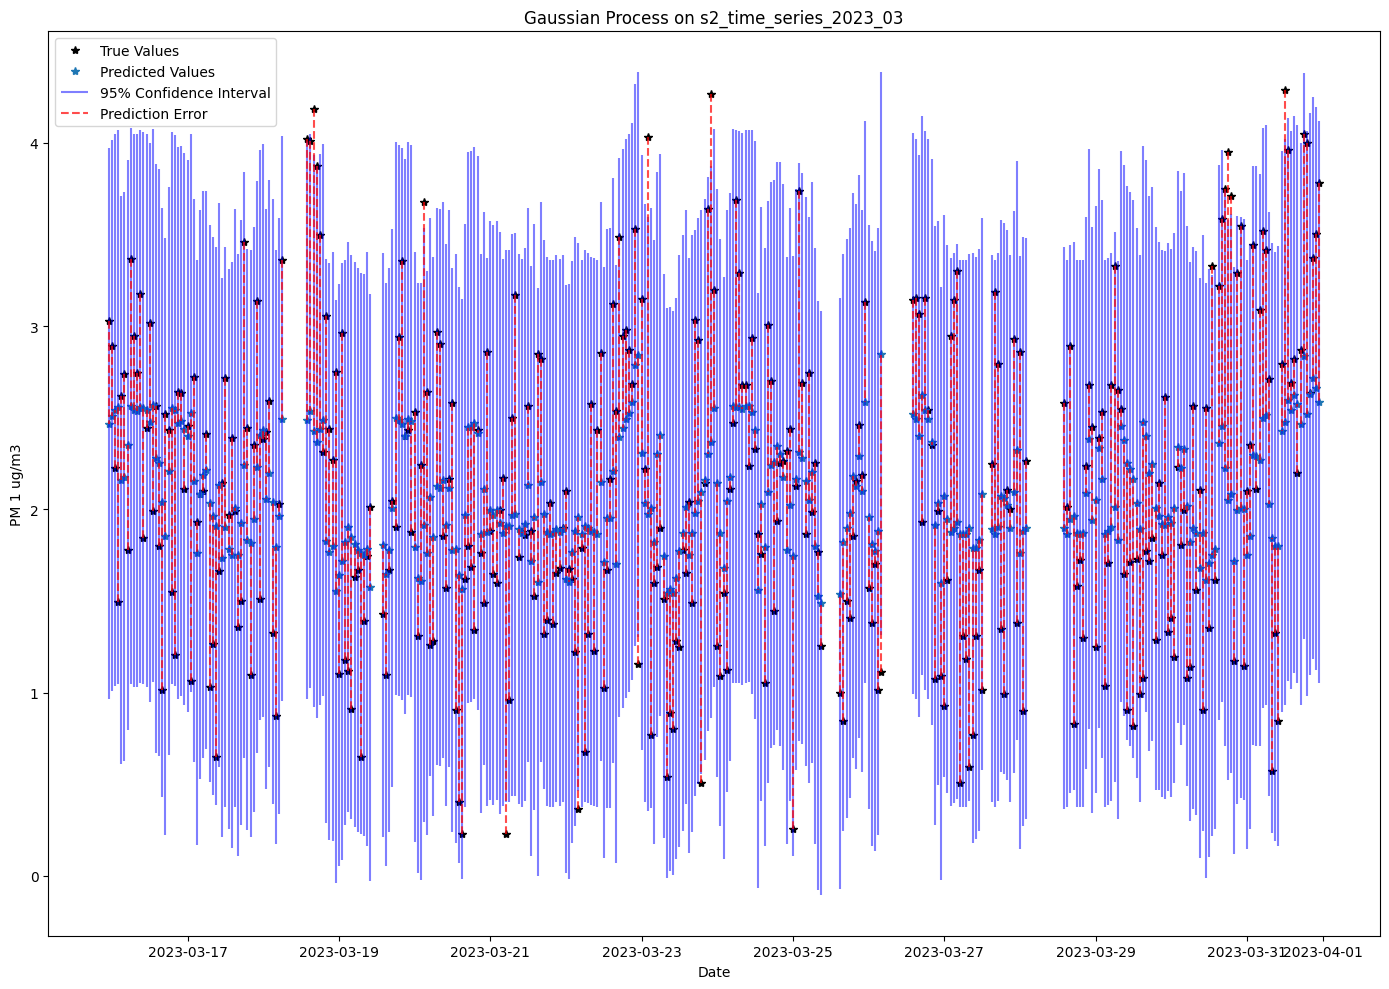

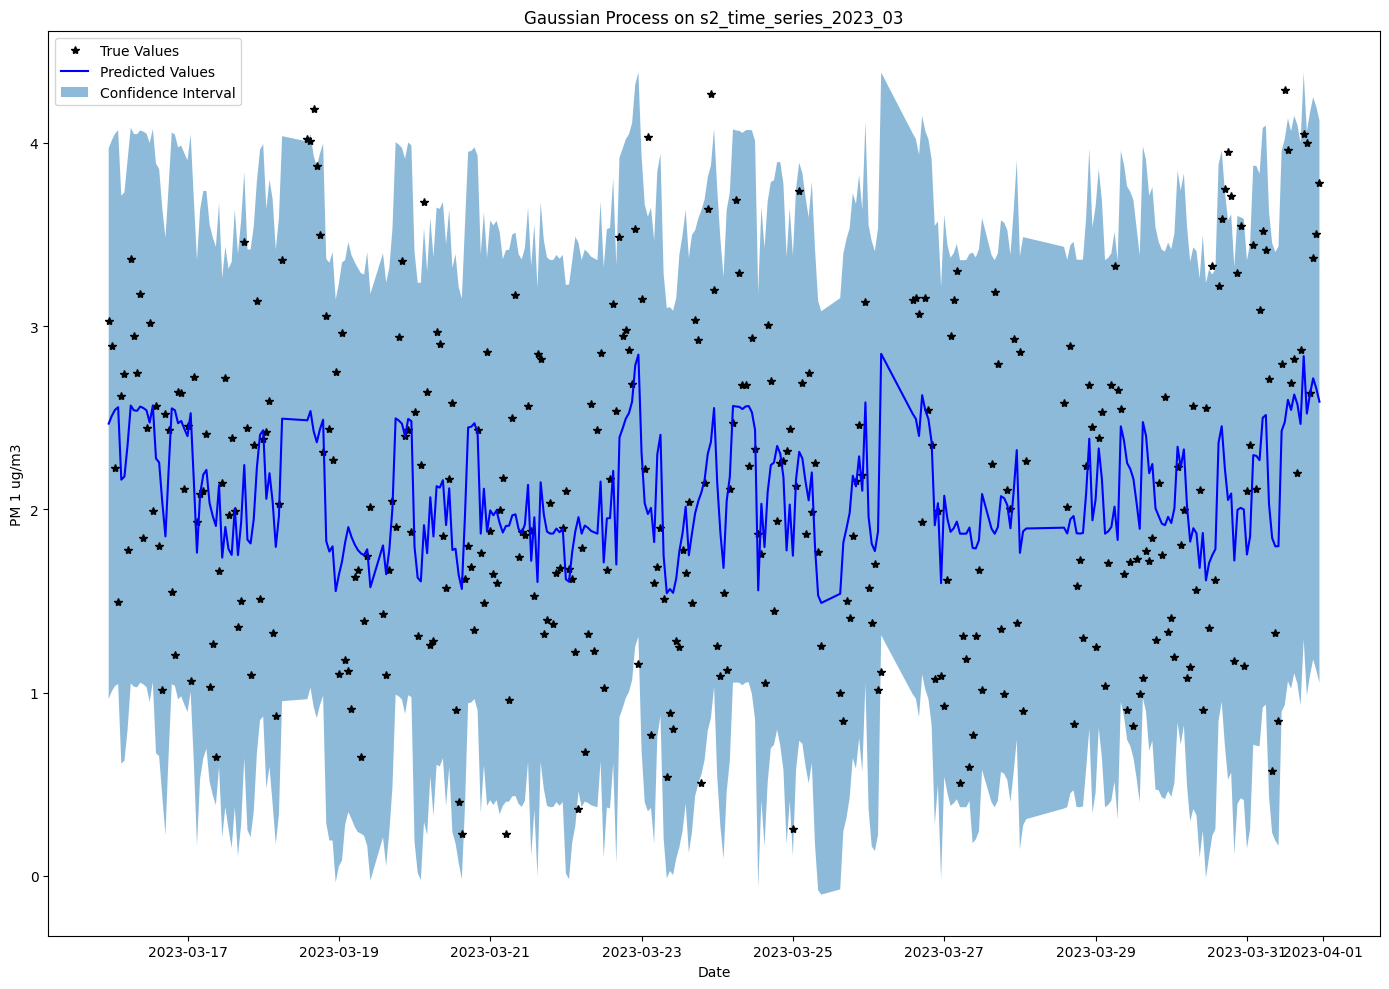

 
GP on s2 time series 2023 04 log_normalized data 50% test and train on both sets


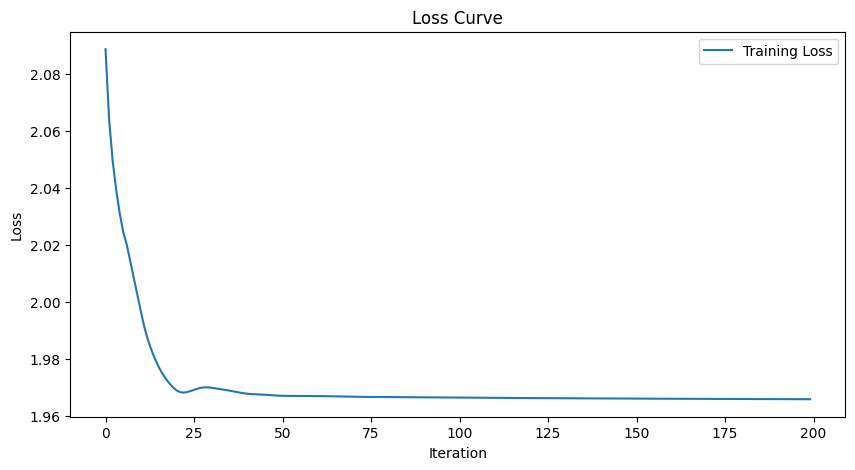

Mean Squared Error: 0.580
Coverage Probability: 0.963
Interval Score: 3.604


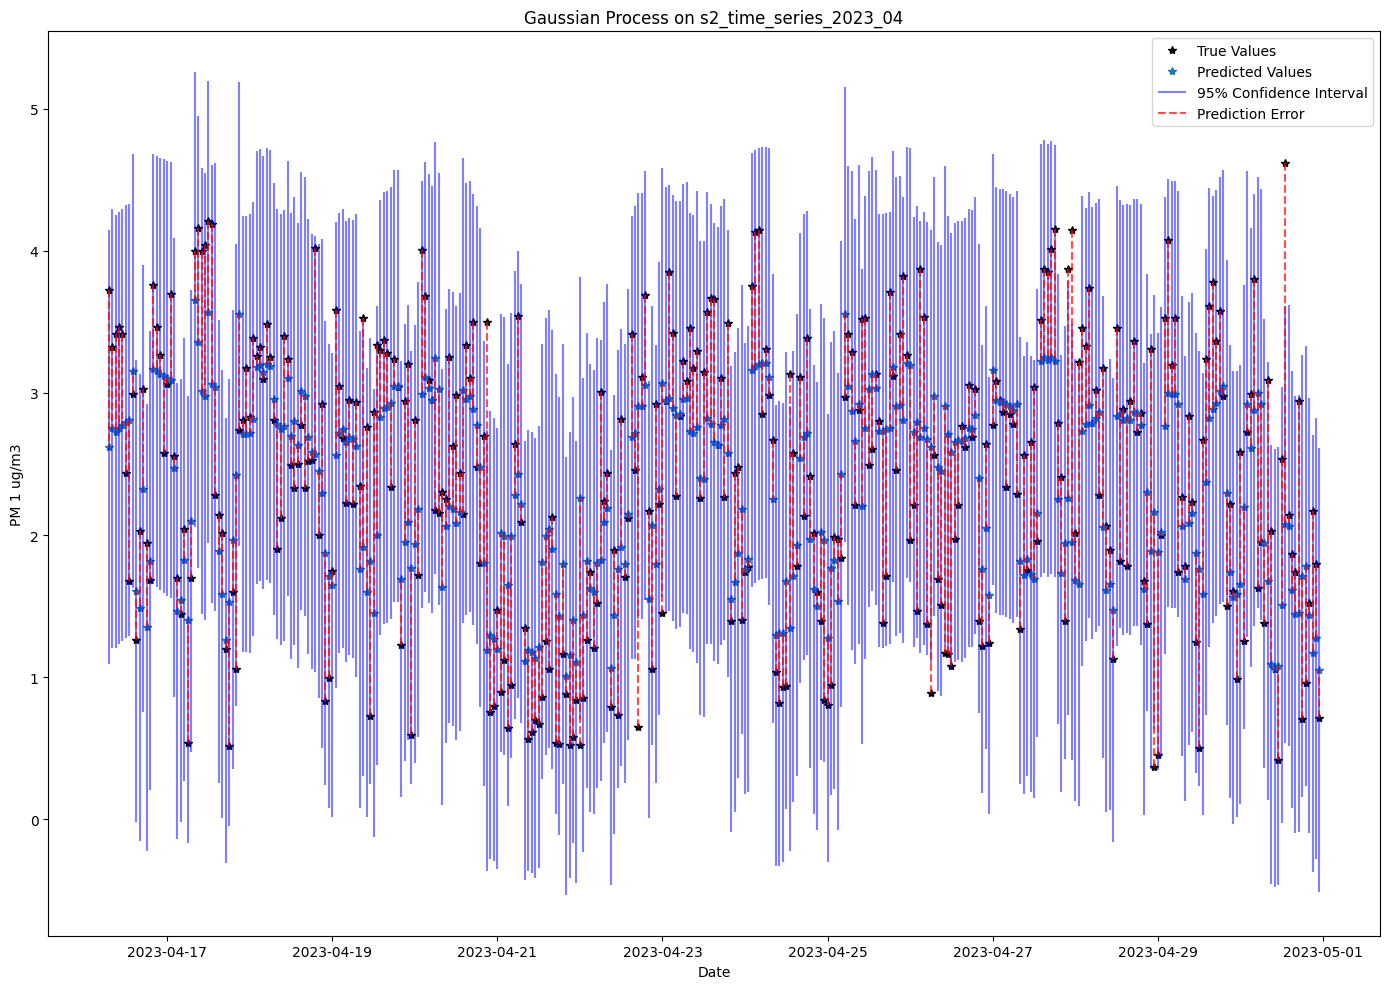

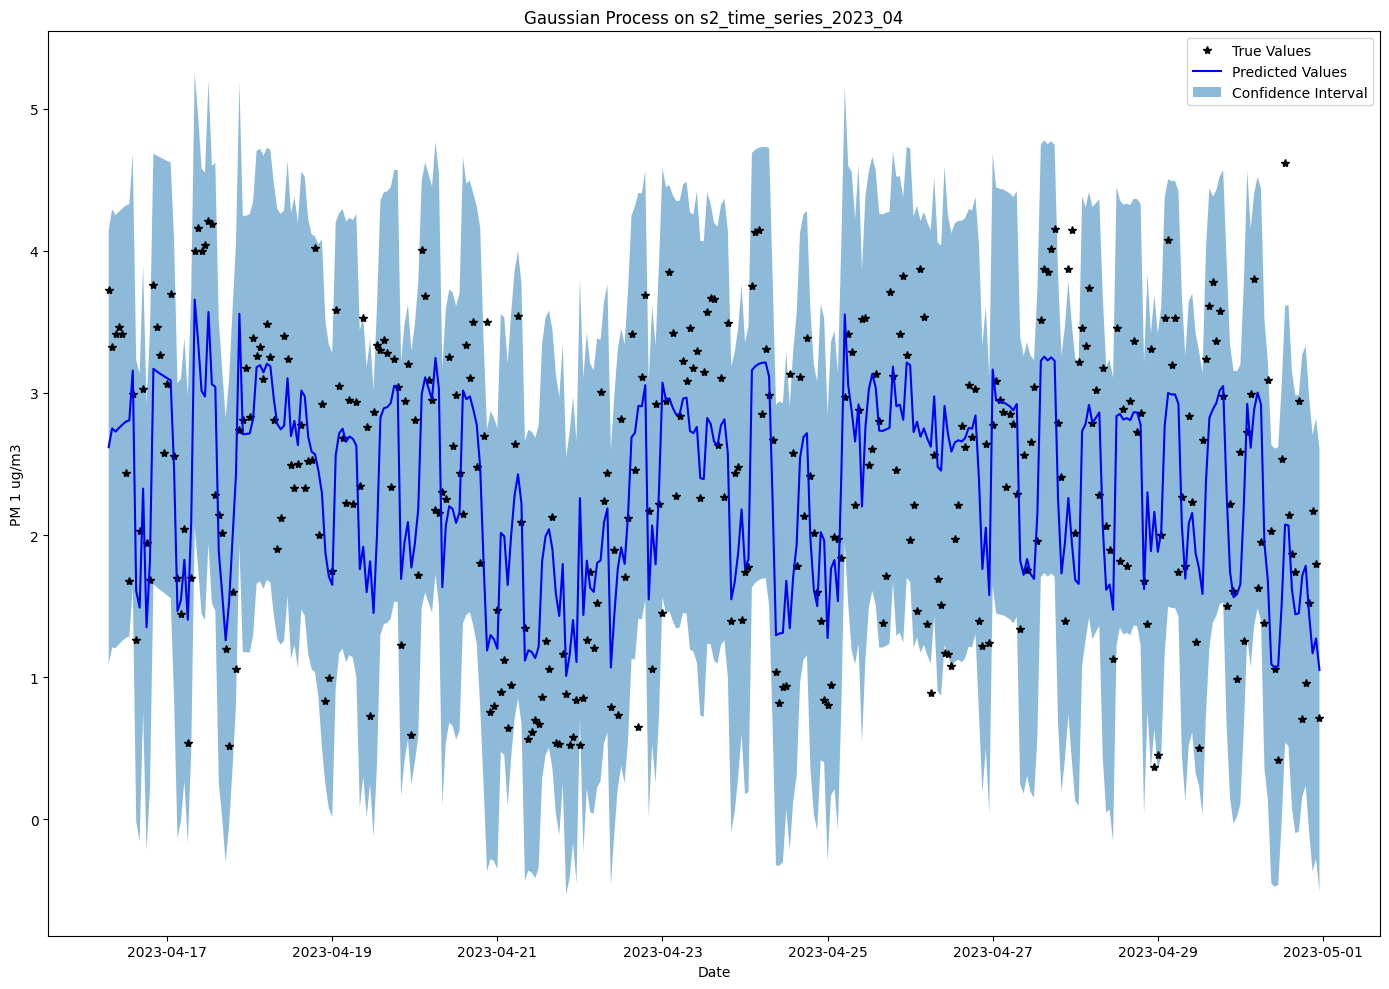

 
GP on s2 time series 2023 05 log_normalized data 50% test and train on both sets


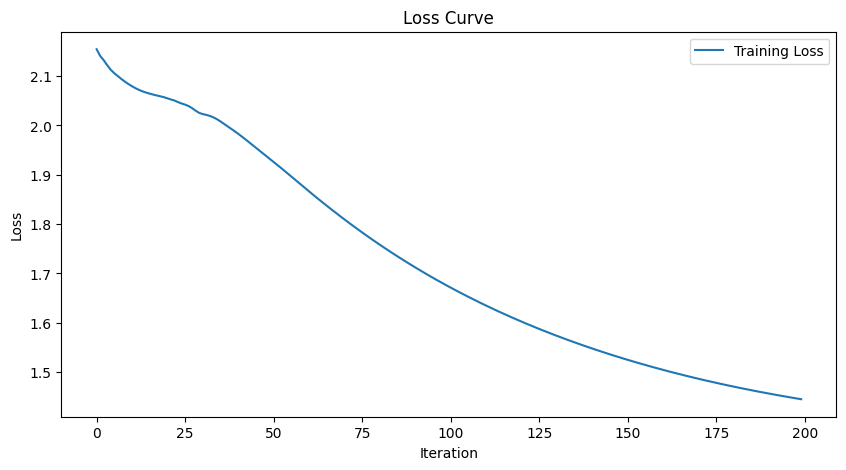

Mean Squared Error: 0.694
Coverage Probability: 0.954
Interval Score: 4.118


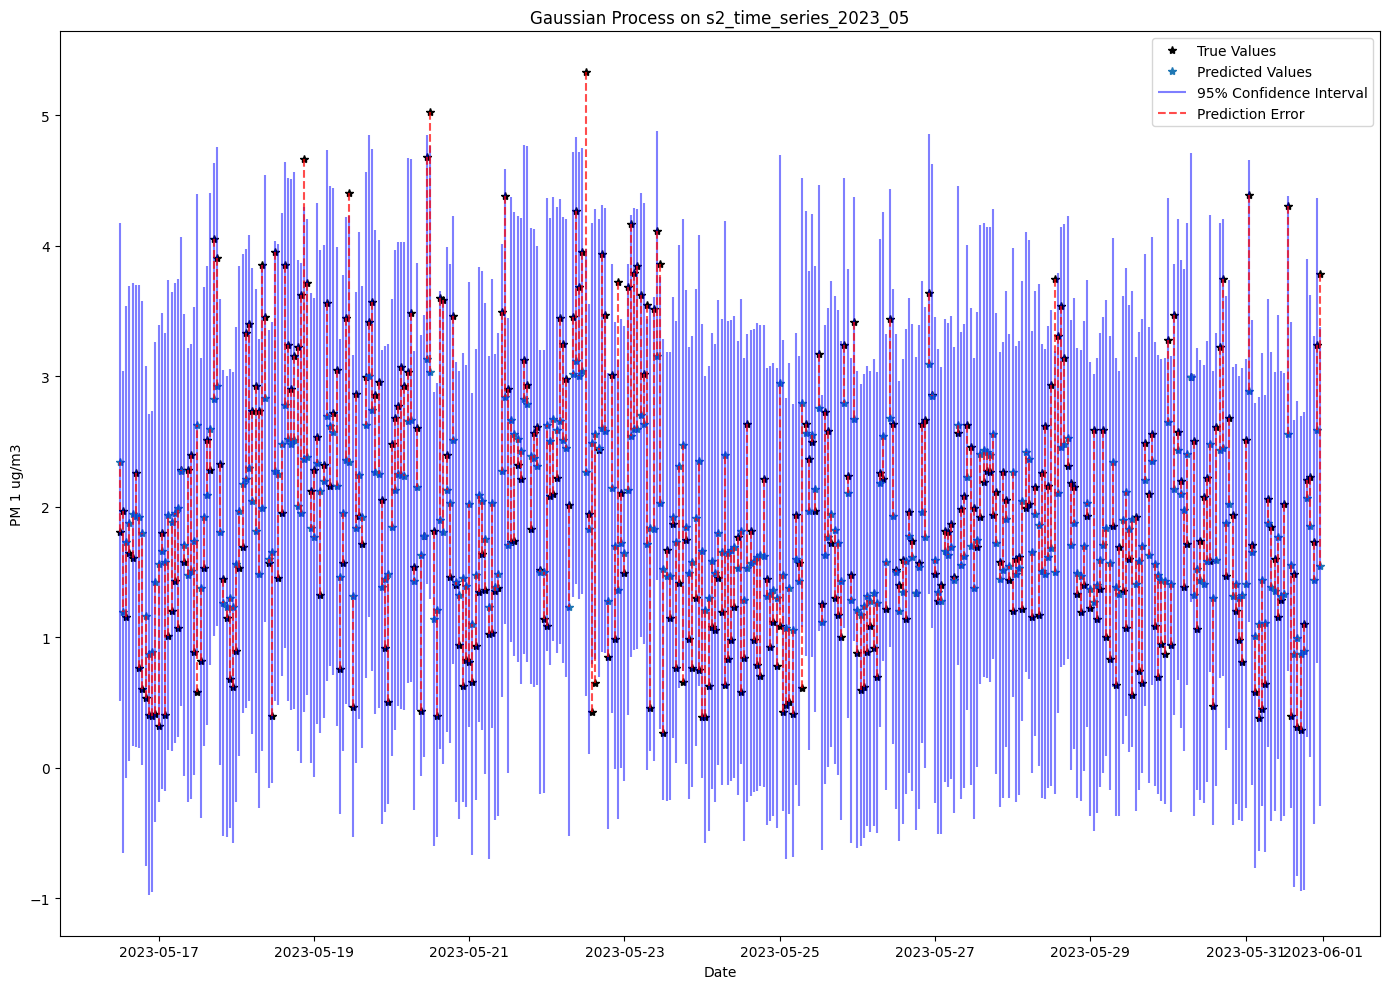

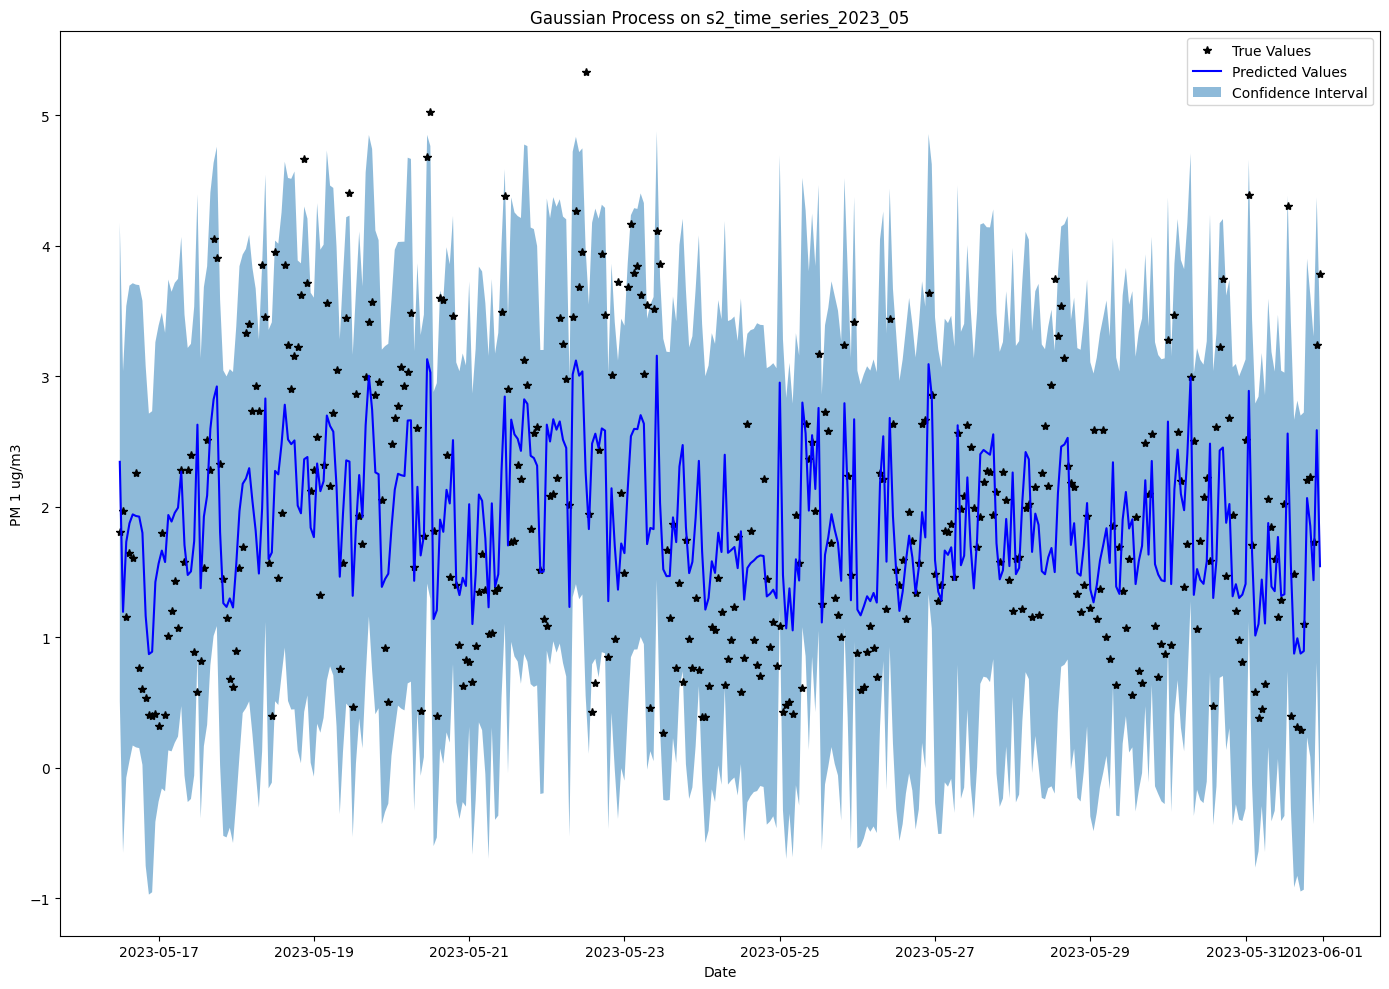

 
GP on s2 time series 2023 06 log_normalized data 50% test and train on both sets


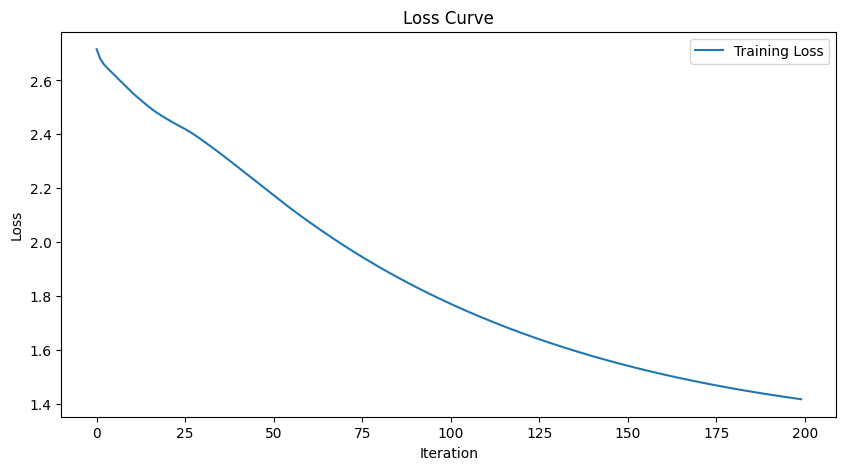

Mean Squared Error: 0.590
Coverage Probability: 0.980
Interval Score: 3.365


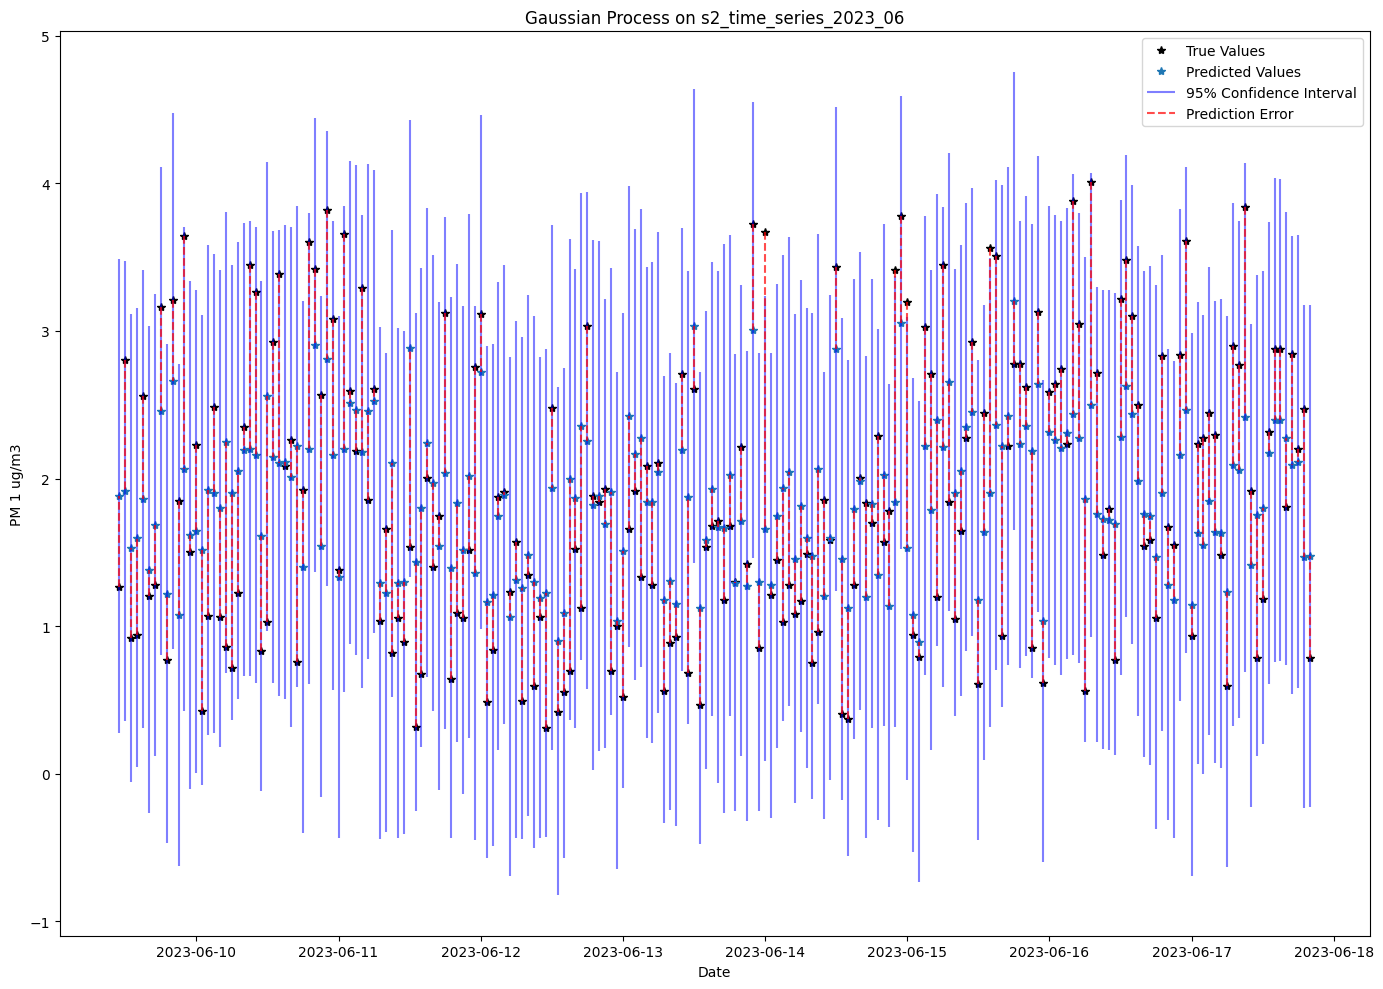

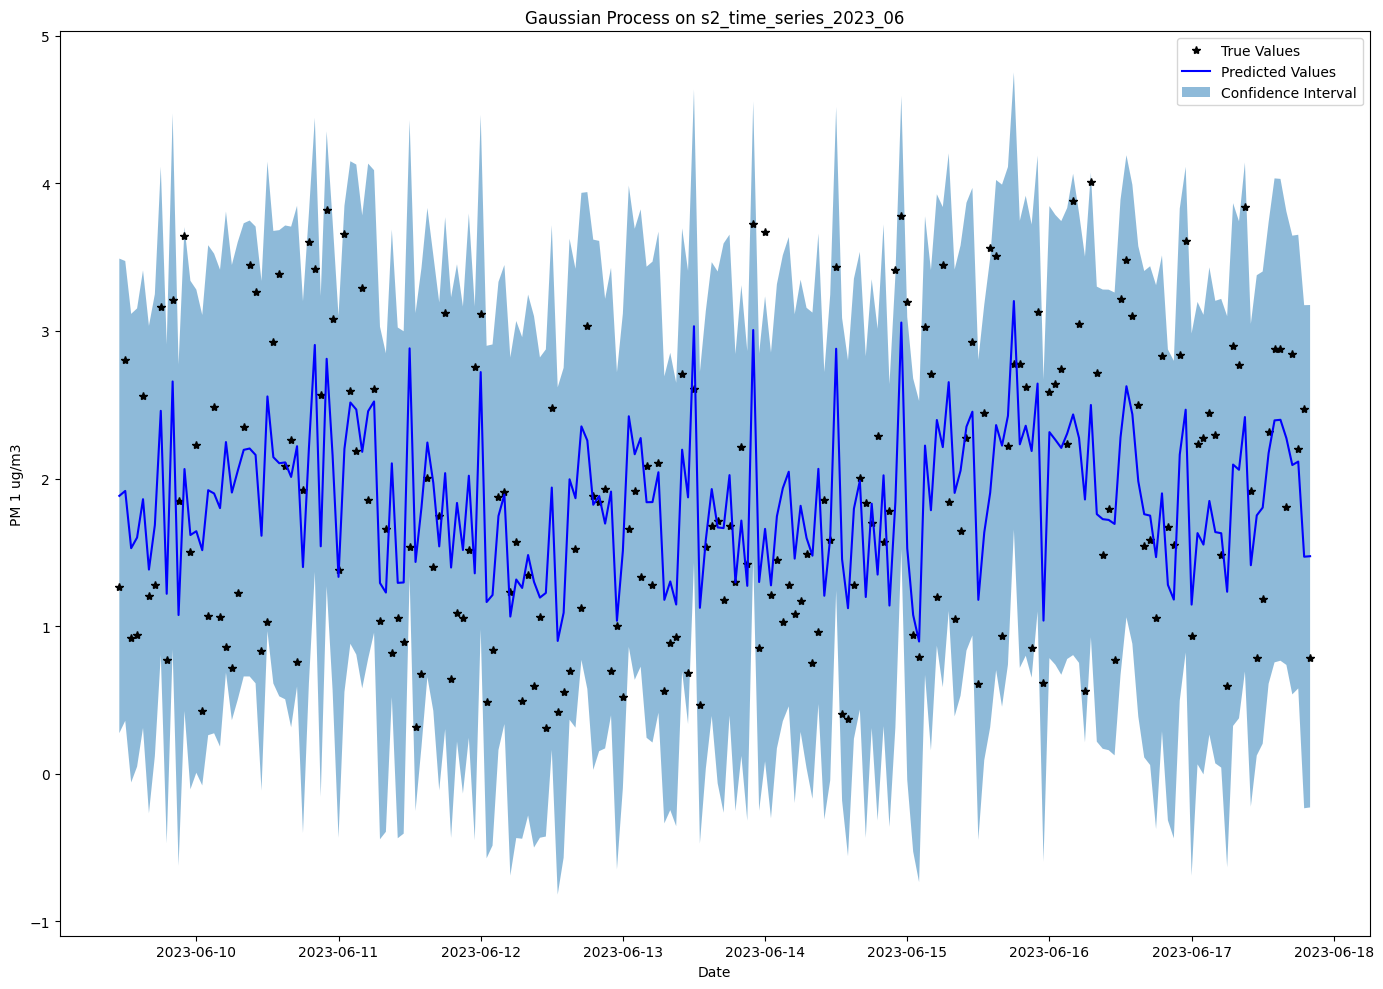

In [50]:
def log_normalize(data):
    epsilon = 1e-6
    data = np.maximum(data, 0)  # Ensure all values are non-negative
    return np.log1p(data + epsilon)


# Define the month keys for s2 data
s2_keys = {
    's2_time_series_2022_06': s2_june22,
    's2_time_series_2022_07': s2_july22,
    's2_time_series_2022_08': s2_aug22,
    's2_time_series_2022_09': s2_sept22,
    's2_time_series_2022_10': s2_oct22,
    's2_time_series_2022_11': s2_nov22,
    's2_time_series_2022_12': s2_dec22,
    's2_time_series_2023_01': s2_jan23,
    's2_time_series_2023_02': s2_feb23,
    's2_time_series_2023_03': s2_mar23,
    's2_time_series_2023_04': s2_apr23,
    's2_time_series_2023_05': s2_may23,
    's2_time_series_2023_06': s2_june23,
}


# Loop through all months
for key, data in s2_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_s2_dict[key], f'Gaussian Process on {key}', 0)
    print(" ")


In [ ]:
# Define the month keys for m1 data
m1_keys = {
    'm1_time_series_2022_06': m1_june22,
    'm1_time_series_2022_07': m1_july22,
    'm1_time_series_2022_08': m1_aug22,
    'm1_time_series_2022_09': m1_sept22,
    'm1_time_series_2022_10': m1_oct22,
    'm1_time_series_2022_11': m1_nov22,
    'm1_time_series_2022_12': m1_dec22,
    'm1_time_series_2023_01': m1_jan23,
    'm1_time_series_2023_02': m1_feb23,
    'm1_time_series_2023_03': m1_mar23,
    'm1_time_series_2023_04': m1_apr23,
    'm1_time_series_2023_05': m1_may23,
    'm1_time_series_2023_06': m1_june23,
}

# Loop through all months
for key, data in m1_keys.items():
    print(f'GP on {key.replace("_", " ")} log_normalized data 50% test and train on both sets')
    run_plt_gp(log_normalize(data), time_series_m1_dict[key], f'Gaussian Process on {key}', 0)
    run_plt_gp(log_normalize(data), time_series_m1_dict[key],f'Gaussian Process on {key}', 1)
    print(" ")
